# Choosing and Explaining Likely Chemical properties for semiconductors

Programming Language: R 3.6.0 in Jupyter Notebook

R Libraries used:
- caret

- tidyverse

- RColorBrewer

- scales

- grid

- gridExtra

- leaps

- glmnet

- xgboost

- broom

## Table of Contents

* Introduction

* Data Exploration

* Variable Identification and Explanation

* Model Development

* Model Comparison

* Conclusion

* References

## 1. Introduction

Superconducting materials are the materials that conduct current with zero electrical resistance which occurs at absolute low temperatures. This low temperature is known as the critical temperature. At this temperature the transition of the material into a superconductor is so sudden that it appears to be a transition into a different phase of matter. Superconductors have many prominent applications such as superconducting coils and Magnetic Resonance Imaging (MRI) used in the healthcare domain for internal body imaging.

Predicting the critical temperature of a superconductor is still an open issue. In this notebook, we will analyze the superconductor data from the Superconducting Material Database maintained by Japan’s National Institute for Materials Science (NIMS) and predict the critical temperature of the material given the chemial properties. This analysis will help the researchers in synthesizing superconducting materials. 

In the first part we analyze the data through Exploratory Data Analysis wherein we will understand the nature of the data, distribution of different variables affecting the critical temperature and the correlation between the variables.

After EDA, we will implement various variable selection methods to identify and select important variables. At the end, we will build different statistical models for predicting critical temperature given the chemical properties of the material and compare the models based on the accuracy parameters and select the most appropriate model.

The dataset consists of:

* train.csv

* unique m.csv

### 1.1 Libraries

In [1]:
require(leaps)
require(caret)
require(leaps)
require(broom)
library(caret)
library(tidyverse)
library(RColorBrewer)
library(scales)
library(grid)
library(gridExtra)
library(leaps)
library(glmnet)
library(xgboost)
library(broom)

Loading required package: leaps
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: broom
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.2     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.1
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.2     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading 

### 1.2 Loading the dataset

In [2]:
df_train <- read.csv("train.csv")

## 2. Data Exploration

Dimensions of the datsset

In [3]:
dim(df_train)

[1] 21263    82

* The superconductor dataset consists of 82 columns including the target variable and 21263 rows. 


The overall structure of the data is as follows:

In [4]:
str(df_train)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $



All the variables are numerial continuous except the variables i.e., number_of_elements, range_atomic_radius and range_Valence which appear to be numerical discrete. The target variable "critical_temp" is numerical continuous which indicates that we will be predicting continuous variable using statistical models.



In [5]:
head(df_train)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,⋯,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,⋯,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,⋯,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,⋯,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,⋯,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,⋯,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,⋯,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23




Each row in the given superconductor dataset indicates a separate superconducting material with different number of elements and chemical properties 



In [6]:
summary(df_train)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  



From the above summary statistics we can observe the following:

* The number of elements in a particular superconducting material can be between 1 to 9

* Many variables might contain outliers. This can be observed in variables such as mean_atomic_mass, wtd_mean_atomic_mass, gmean_atomic_mass, wtd_range_atomic_mass, wtd_range_atomic_radius where they have very high max value as compared to their median and 3rd quartile values. This behaviour can be observed more closely with the help of boxplots.

* For the target variable "critical_temp" lies between 0.00021-185K which indicates that the materials can attain superconductivity not only at very low temperatures but can occur at considerably high temperatures [1].

The given superconductor dataset has 10 features each of the following properties:

* Atomic Mass

* First Ionization Energy

* Atomic Radius

* Density

* Electron Affinity

* Fusion Heat

* Thermal Conductivity

* Valence

Atomic Mass, Atomic Radius, Density and Fusion Heat may have a higher contribution towards predicting the critical temperature [2]. Therefore, we first analyze features of these properties.

Each chemical property has 10 features each viz., mean, weighted mean, geometric mean, weighted geometric mean, entropy, weighted entropy, range, weighted range, standard deviation and weighted standard deviation. We will be analyzing each of these features and their effect on critical temperature



### 2.1 Analysis of Atomic Mass features

In [7]:
# Extracting 10 features corresponding to atomic mass
atomic_mass_df <- df_train[,1:11]

In [8]:
attach(atomic_mass_df)
head(atomic_mass_df)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,53.62253
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,53.97987
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,53.65627
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,53.63940
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,53.58877
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,53.52115




The chemical property Atomic Mass has 10 features which are all numerical continuous variables. 
Here we will also be considering number of elements along with the atomic mass properties for analysis

Lets check the variable distributions with the help of box plots



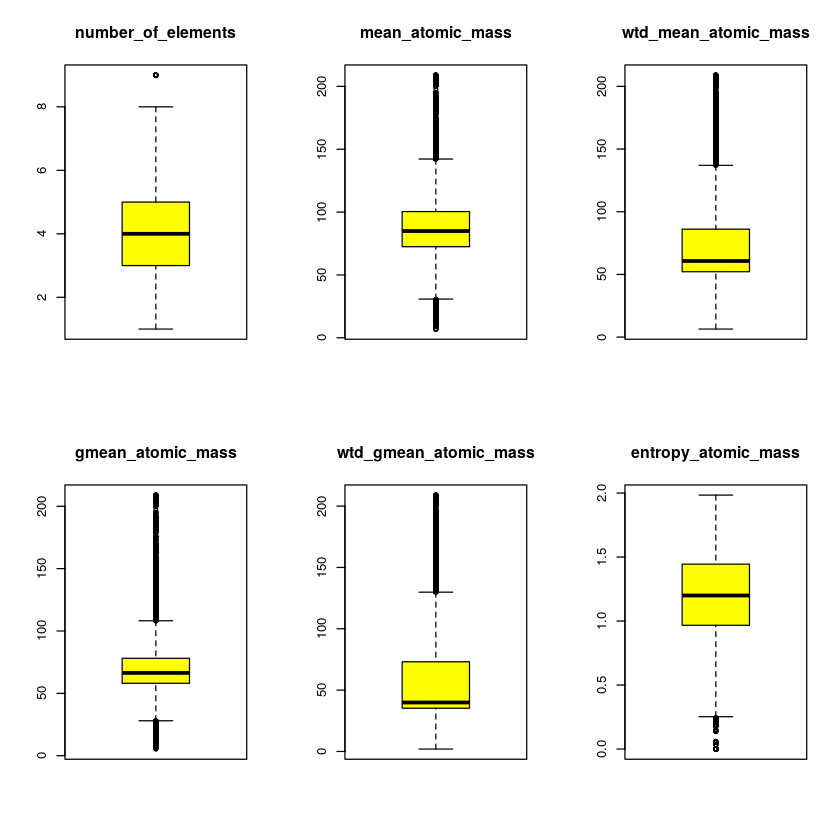

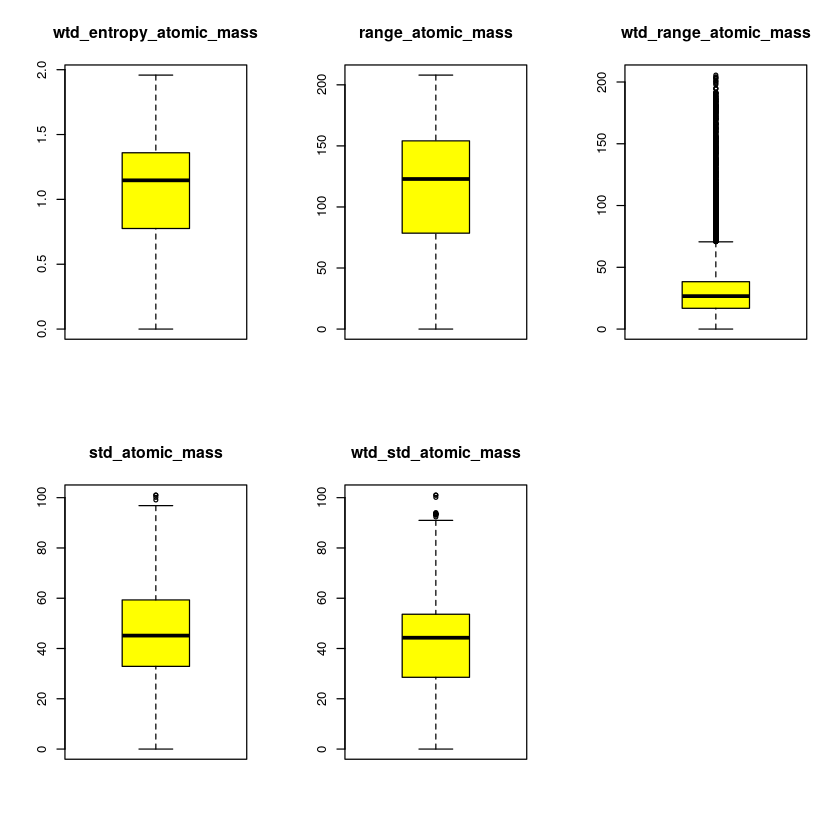

In [9]:
par(mfrow = c(2,3))
for (i in 1:(length(atomic_mass_df))) {
boxplot(atomic_mass_df[,i], main = names(atomic_mass_df[i]), type="l", col = 'yellow')
}


* Like we observed in the summary statistics and from the above box plots, it is evident that mean_atomic_mass, wtd_mean_atomic_mass, gmean_atomic_mass, wtd_gmean_atomic_mass and wtd_range_atomic_mass contain large amount of outliers.

* wtd_gmean_atomic_mass has less variation in the data



We can understand the variable distributions using histograms and bar charts



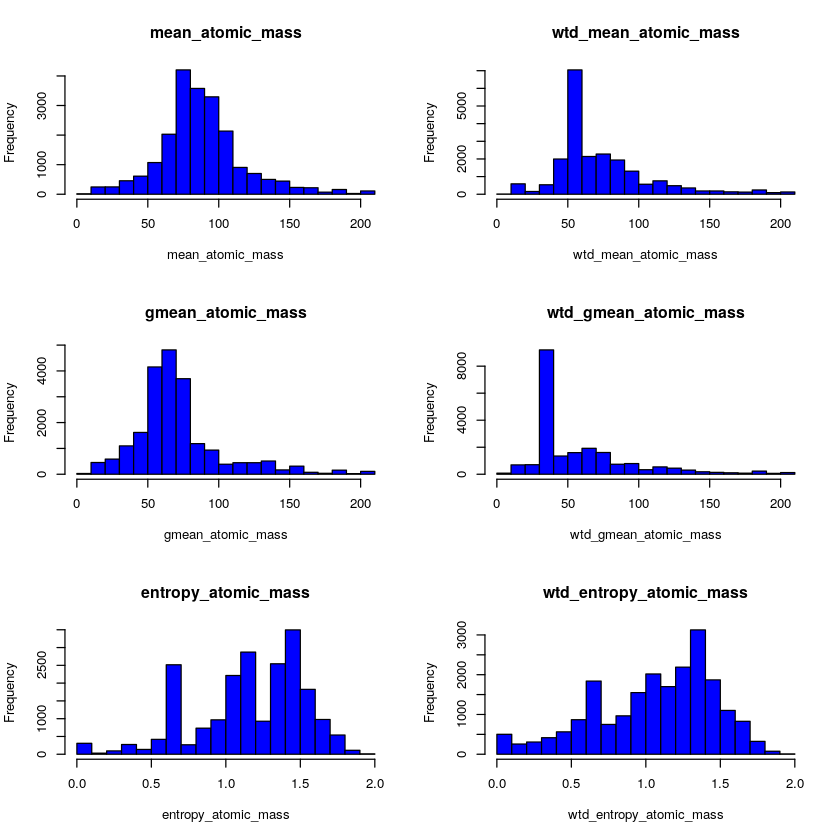

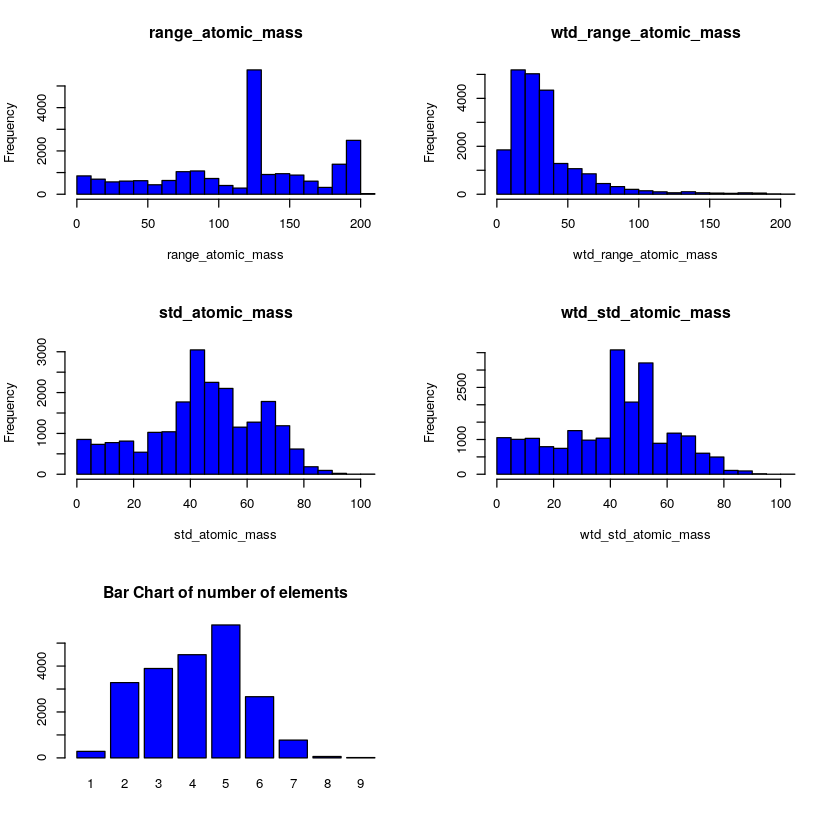

In [10]:
par(mfrow = c(3,2))
atm_col <- colnames(atomic_mass_df)
for (i in 2:(length(atm_col))) {
    hist(atomic_mass_df[,i], main=names(atomic_mass_df[i]), xlab = names(atomic_mass_df[i]), col="blue")
}
plot(as.factor(number_of_elements),main="Bar Chart of number of elements", col="blue")


* From the above distributions, we can observe that mean_atomic_mass has a normal distribution

* Most of the materials have 5 number of elements involved in it.

* Most of the materials have gmean_atomic_mass between 50-80

* There is a spike observed in wtd_gmean_atomic_mass which indicates that more than 8000 of the superconducting materials have wtd_gmean_atomic_mass around 30

* wtd_range_atomic_mass distribution is right skewed with most of the materials having the range between 0-50.

Replotting wtd_range_atomic_mass to see if the log scale has normal distribution



Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 285 rows containing non-finite values (stat_bin).”

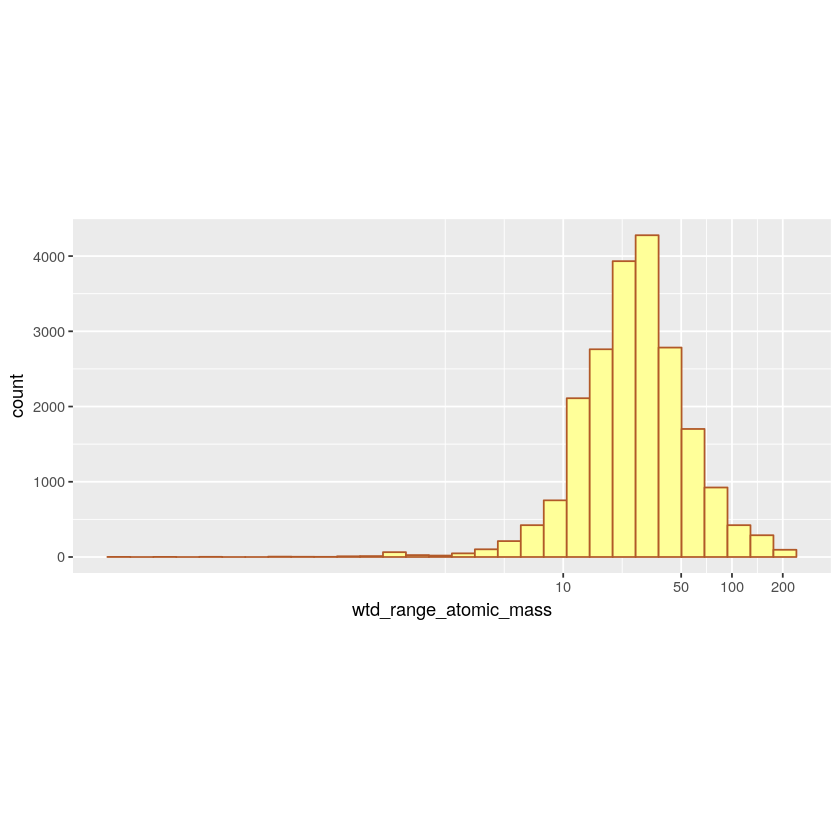

In [11]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p3 <- ggplot(aes(x=wtd_range_atomic_mass), data=atomic_mass_df) +
      geom_histogram(bins=30, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(10,50,100,200,500,1000))
grid.arrange(p3, heights=unit(0.5, "npc"), nrow = 1)

The log of wtd_range_atomic_mass is not quite normal as it demonstartes a normal curve between 5-200 units but contains many outliers below 3 units.



In [12]:
#function for correlation matrix
# DIY correlation plot
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
# there's some truth to the quote that modern programming is often stitching together pieces from SO 

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

# usage e.g.:
# pairs(mtcars, upper.panel = panel.cor)

In [13]:
# Renaming the variables for correlation matrix
atomic_mass_df <- atomic_mass_df %>% 
  rename(
    n_elem = number_of_elements,
    m_mass = mean_atomic_mass,
    wtd_m_mass = wtd_mean_atomic_mass,
    gm_mass = gmean_atomic_mass,
    wtd_gm_mass = wtd_gmean_atomic_mass,
    e_mass = entropy_atomic_mass,
    wtd_e_mass = wtd_entropy_atomic_mass,
    r_mass = range_atomic_mass,
    wtd_r_mass = wtd_range_atomic_mass,
    std_mass = std_atomic_mass,
    wtd_std_mass = wtd_std_atomic_mass
    )



Analyzing the relationship of the atomic mass features with the critical tempearture with the help of pairwise correlation plot 



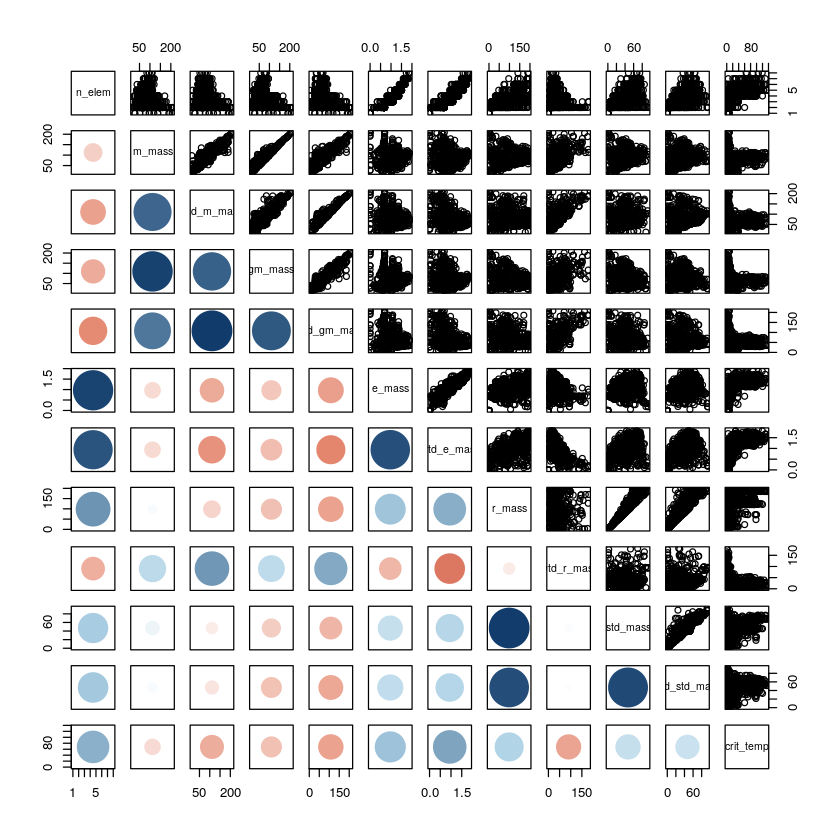

In [14]:
# pairwise correlation matrix with the target variable
atomic_mass_df <- cbind(atomic_mass_df, crit_temp=df_train[,82])
pairs(atomic_mass_df[sample.int(nrow(atomic_mass_df),1000),], lower.panel=panel.cor, col="black")


In the above pairwise correlation plot, the blue dots indicate positive correlation and red dots indicate negative correlation. The size of the dots determine the intensity of the correlation.

From the above pairwise correlation plot, we can observe the following:

* wtd_mean_atomic_mass is positively correlated to gmean_atomic_mass which means that with the increase in weighted mean, the gmean atomic mass will also increase.

* wtd_mean_atomic_mass is highly negatively correlated to critical temp as compared to gmean_atomic_mass. Therefore, on the basis of multicollinearity gmean_atomic_mass predictor can be eliminated.

* std_atomic_mass and wtd_std_atomic_mass are highly positively correlated but std_atomic_mass is also highly positively correlated to critical_temp. Therefore, wtd_std_atomic_mass can be eliminated.

* wtd_mean_atomic_mass is positively correlated to wtd_gmean_atomic_mass but wtd_mean_atomic_mass is highly negatively correlated to critical_temp. Therefore, wtd_gmean_atomic_mass can be eliminated.

* Similarly due to multicollinearity present between the predictors and target variable "critical_temp", predictors such as gmean_atomic_mass, wtd_std_atomic_mass, range_atomic_mass, wtd_gmean_atomic_mass, entropy_atomic_mass can be eliminated.

* Therefore, variables such as mean_atomic_mass, wtd_mean_atomic_mass, wtd_entropy_atomic_mass, wtd_range_atomic_mass, std_atomic_mass can be chosen as they seem to affect critical temperature of the material by some amount. 

From the above plot it can also be observed that number_of_elements is positively correlated to the critical_temp.
Let's have a closer view



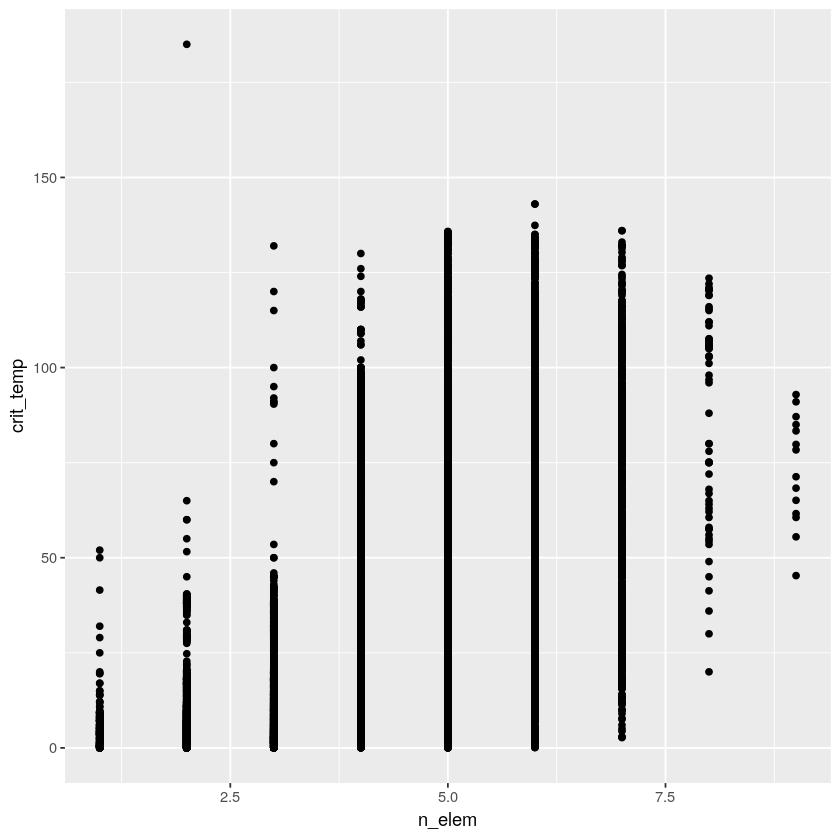

In [15]:
ggplot(data=atomic_mass_df, aes(x=n_elem, y=crit_temp))+ geom_point()


In the above graph, the X-axis represents the number of elements in the material and the Y-axis represents the critical temperature. It can be observed that the critical temperature of the materials increases with the increase in the number of elements. There is a large increase in the critical temperature for materials containing more than 3 elements.



### 2.2 Analysis of Atomic Radius features

In [16]:
#Extracting 10 features corresponding to atomic radius
atomic_radius_df <- df_train[,22:31]

In [17]:
attach(atomic_radius_df)
head(atomic_radius_df)

mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
160.25,105.5143,136.1260,84.52842,1.259244,1.207040,205,42.91429,75.23754,69.23557
161.20,104.9714,141.4652,84.37017,1.508328,1.204115,205,50.57143,67.32132,68.00882
160.25,104.6857,136.1260,84.21457,1.259244,1.132547,205,49.31429,75.23754,67.79771
160.25,105.1000,136.1260,84.37135,1.259244,1.173033,205,46.11429,75.23754,68.52166
160.25,106.3429,136.1260,84.84344,1.259244,1.261194,205,36.51429,75.23754,70.63445
160.25,108.0000,136.1260,85.47701,1.259244,1.331339,205,23.71429,75.23754,73.32413



The chemical property Atomic Radius has 10 features which are all numerical continuous variables except range_atomic_radius.

Lets check the variable distributions with the help of box plots



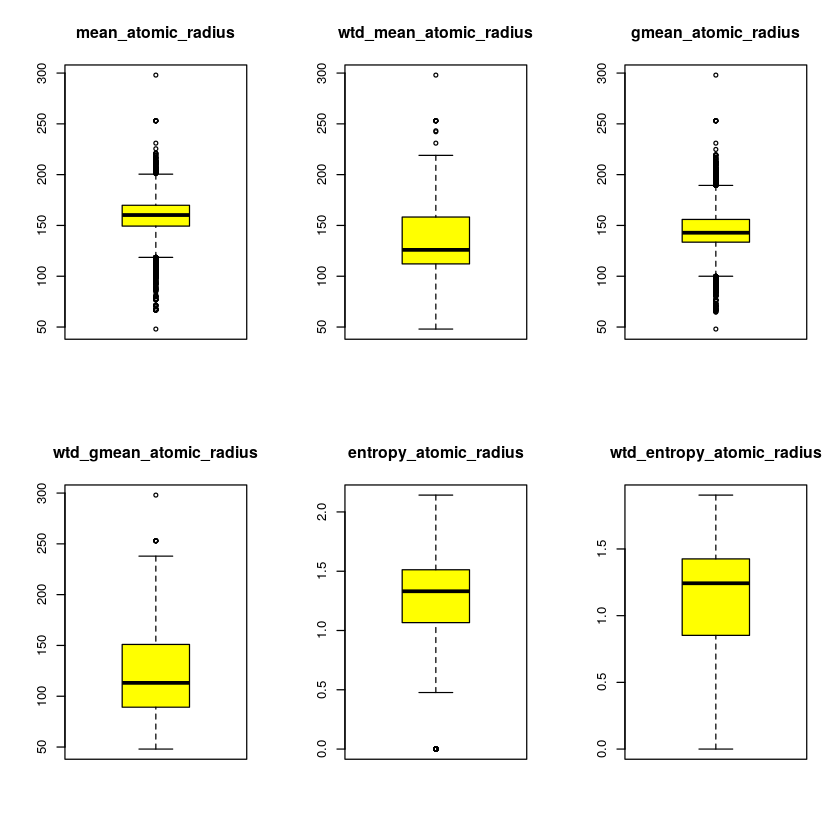

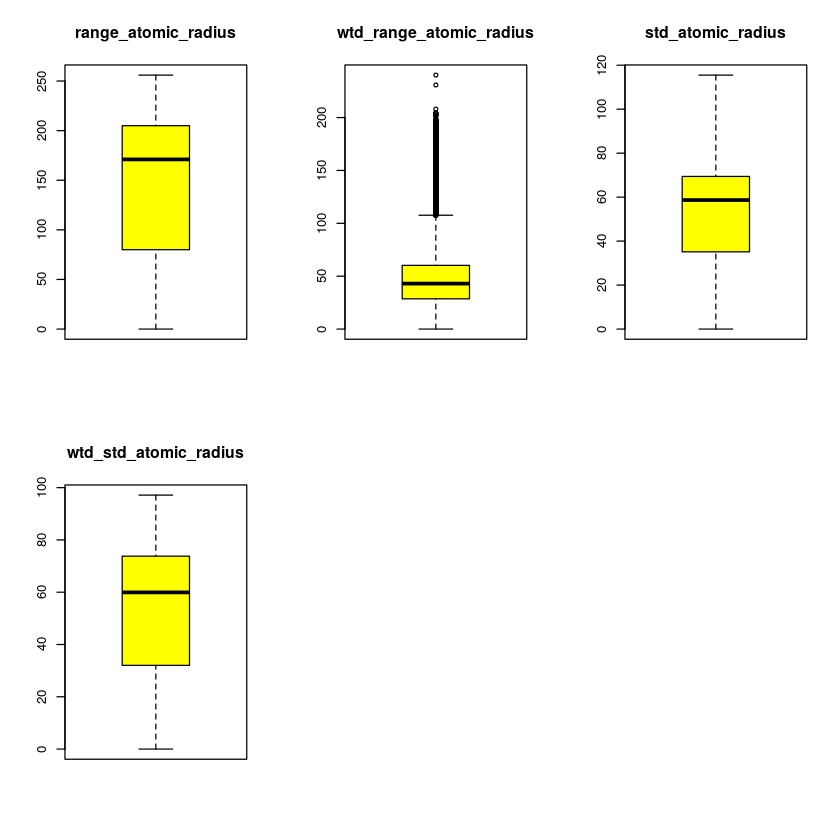

In [18]:
par(mfrow = c(2,3))
for (i in 1:(length(atomic_radius_df))) {
boxplot(atomic_radius_df[,i], main = names(atomic_radius_df[i]), type="l", col = 'yellow')
}


* From the above box plots, it is evident that mean_atomic_radius, gmean_atomic_radius, and wtd_range_atomic_radius contain large amount of outliers.

* range_atomic_radius in the superconducting materials lies between 0-250 units.

* All the variables show a considerate amount of variation in the data with proper IQR




We can understand the variable distributions of all the atomic radius features using histograms



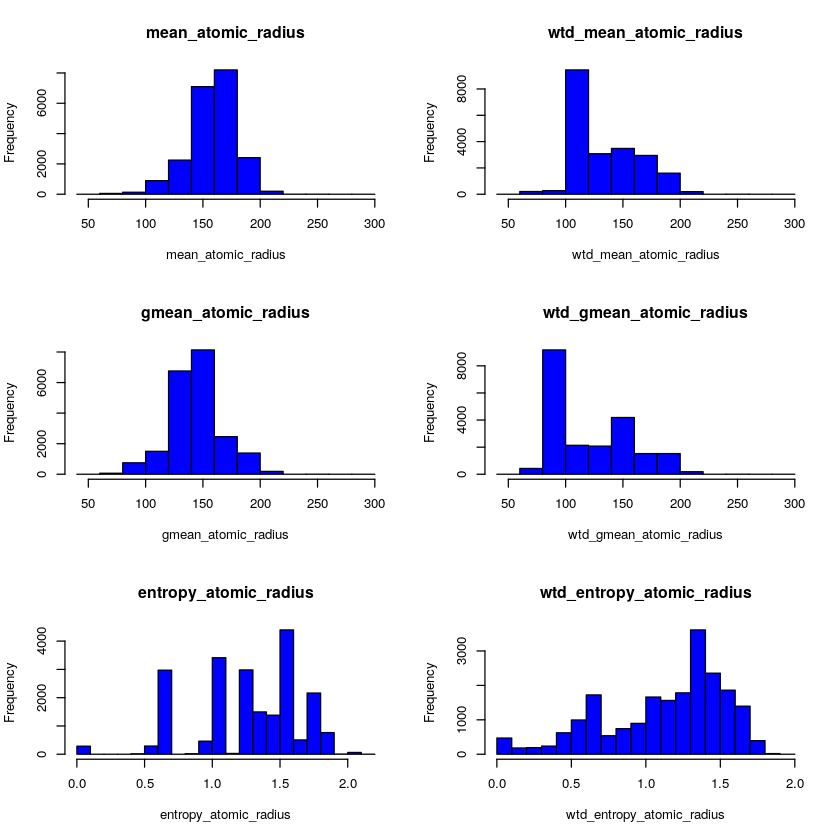

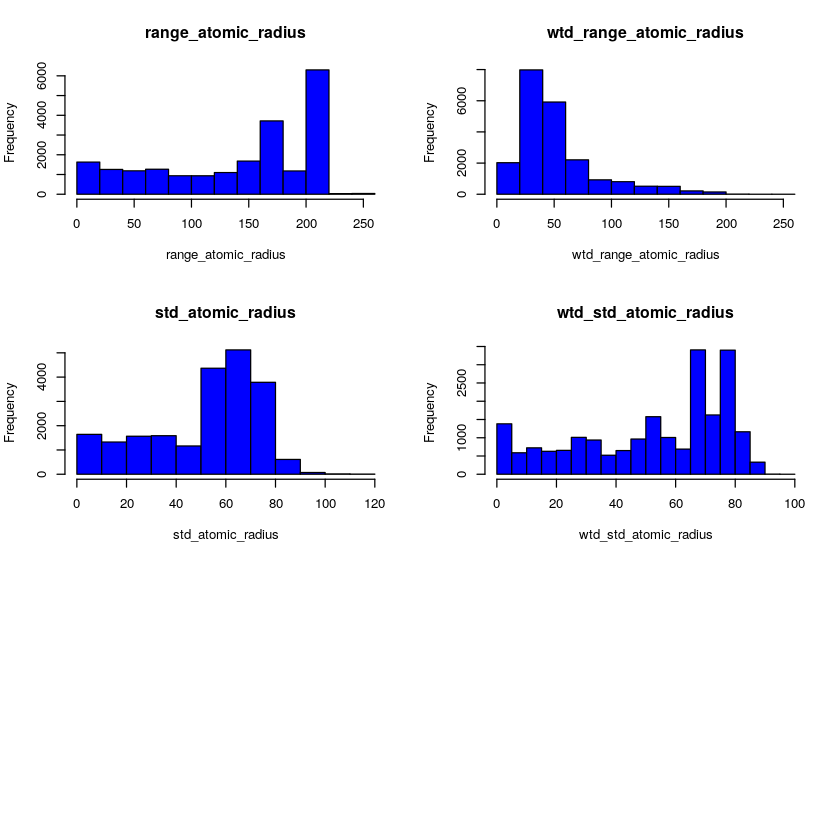

In [19]:
par(mfrow = c(3,2))
atm_col <- colnames(atomic_radius_df)
for (i in 1:(length(atm_col))) {
    hist(atomic_radius_df[,i], main=names(atomic_radius_df[i]), xlab = names(atomic_radius_df[i]), col="blue")
}


From the above distributions, we can observe the following:

* Most of the materials have mean_atomic_radius between 140-180 units.

* More than 8000 of the materials have wtd_mean_atomic_radius around 100-120units

* The distribution of range_atomic_radius is observed to be uniform between 0-170 with unusual spikes at 180 and 200. 

* wtd_range_atomic_radius distribution is right skewed with most of the materials having the range between 0-50.


We will observe how these features of atomic radius affect crtical temperature of the material



In [20]:
# Renaming the variables for correlation matrix
atomic_radius_df <- atomic_radius_df %>% 
  rename(
    m_rad = mean_atomic_radius,
    wtd_m_rad = wtd_mean_atomic_radius,
    gm_rad = gmean_atomic_radius,
    wtd_gm_rad = wtd_gmean_atomic_radius,
    e_rad = entropy_atomic_radius,
    wtd_e_rad = wtd_entropy_atomic_radius,
    r_rad = range_atomic_radius,
    wtd_r_rad = wtd_range_atomic_radius,
    std_rad = std_atomic_radius,
    wtd_std_rad = wtd_std_atomic_radius
    )

Analyzing the relationship of the atomic radius features with the critical tempearture with the help of pairwise correlation plot

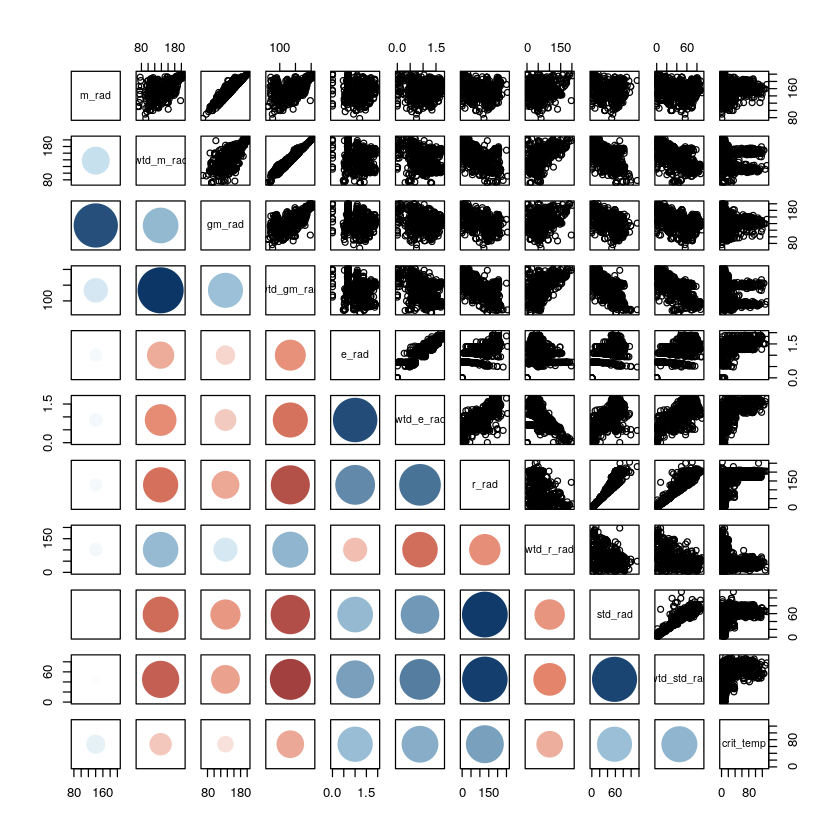

In [21]:
atomic_radius_df <- cbind(atomic_radius_df, crit_temp=df_train[,82])
pairs(atomic_radius_df[sample.int(nrow(atomic_radius_df),1000),], lower.panel=panel.cor, col="black")


In the above pairwise correlation plot, the blue dots indicate positive correlation and red dots indicate negative correlation. The size of the dots determine the intensity of the correlation.

From the above pairwise correlation plot, we can observe the following:

* mean_atomic_radius is positively correlated to gmean_atomic_radius which means that with the increase in the mean, the gmean atomic radius will also increase.

* mean_atomic_radius is positively correlated to critical temp as compared to gmean_atomic_radius. Therefore, on the basis of multicollinearity gmean_atomic_radius predictor can be eliminated.

* wtd_mean_atomic_radius and wtd_gmean_atomic_radius are highly positively correlated but wtd_gmean_atomic_radius is also highly negatively correlated to critical_temp. Therefore, wtd_mean_atomic_radius can be eliminated.

* entropy_atomic_radius is positively correlated to range_atomic_radius but range_atomic_radius is highly positively correlated to critical_temp. Therefore, entropy_atomic_radius can be eliminated.

* Similarly due to multicollinearity present between the predictors and target variable "critical_temp", predictors such as gmean_atomic_radius, wtd_mean_atomic_radius, entropy_atomic_radius, wtd_std_atomic_radius, range_atomic_radius, wtd_entropy_atomic_radius can be eliminated.

* Therefore, variables such as mean_atomic_radius, wtd_gmean_atomic_radius, std_atomic_radius, wtd_range_atomic_radius can be chosen as they seem to affect critical temperature of the material by some amount. 

From the above plot it can also be observed that std_atomic_radius is positively correlated to the critical_temp and wtd_range_atomic_radius is highly negatively correlated to critical_temp.

Let's have a closer view



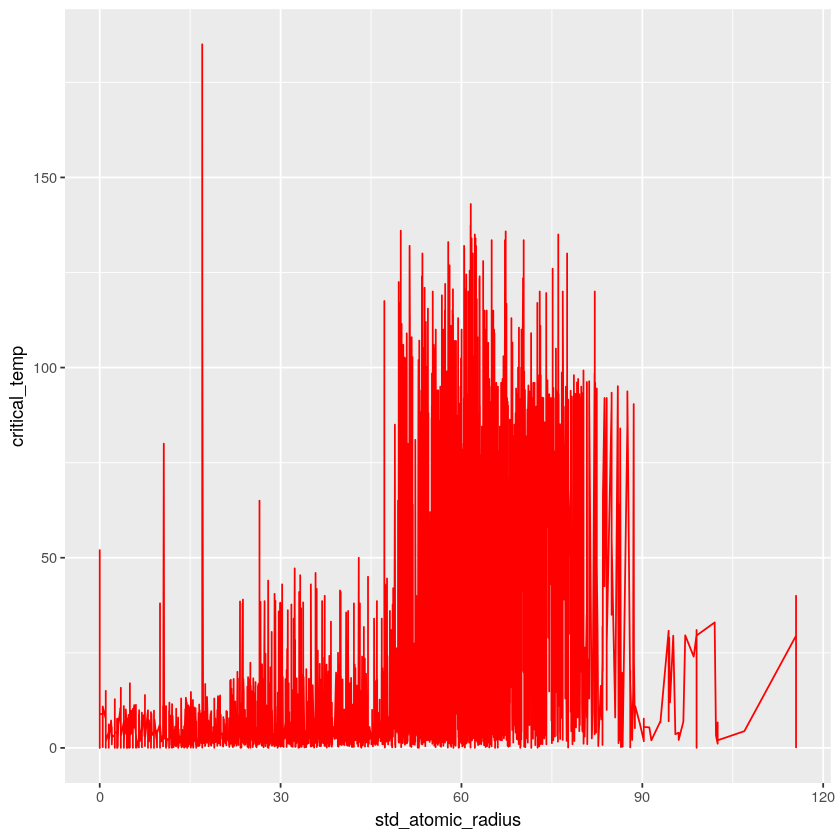

In [22]:
ggplot(data=atomic_radius_df, aes(x=std_rad, y=crit_temp))+ geom_line(col="red") + labs(x="std_atomic_radius", y="critical_temp")


In the above graph, the X-axis represents the standard atomic radius and the Y-axis represents the critical temperature. From the graph, it can be observed that as the standard atomic radius of the material increases the critical temperature also increases. The increase in the critical temperature is evident until standard atomic radius is 90units but for the materials above 90units there is sudden decrease in the critical tempearture.


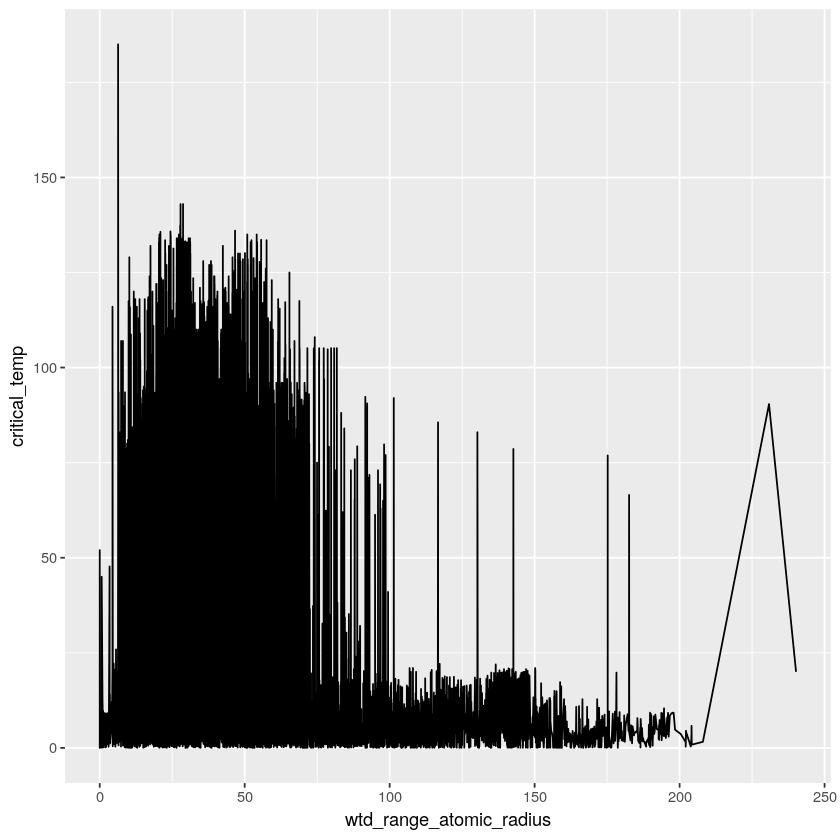

In [23]:
ggplot(data=atomic_radius_df, aes(x=wtd_r_rad, y=crit_temp))+ geom_line() + labs(x="wtd_range_atomic_radius", y="critical_temp")


In the above graph, the X-axis represents the weighted range atomic radius and the Y-axis represents the critical temperature. Weighted range atomic radius is calculated by taking a product of the proportion of the different elements used in the material and their respective atomic radius. From the above graph, it is observed that the critical temperature is very high for the materials with low weighted range atomic radius and it decreases with the increase in the weighted range atomic radius. 


This behaviour may be observed due to the proportion of the elements used in the material i.e., as the proportion of the elements increases the overall weighted range atomic radius increases which may induce a decrease in the critical temperature of the material. 



### 2.3 Analysis of Density features

In [24]:
#Extracting 10 features corresponding to density of the material
density_df <- df_train[,32:41]

In [25]:
attach(density_df)
head(density_df)

mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4654.357,2961.502,724.9532,53.54381,1.033129,0.8145982,8958.571,1579.583,3306.163,3572.597
5821.486,3021.017,1237.0951,54.09572,1.314442,0.9148022,10488.571,1667.383,3767.403,3632.649
4654.357,2999.159,724.9532,53.97402,1.033129,0.7603052,8958.571,1667.383,3306.163,3592.019
4654.357,2980.331,724.9532,53.75849,1.033129,0.7888885,8958.571,1623.483,3306.163,3582.371
4654.357,2923.845,724.9532,53.11703,1.033129,0.8598109,8958.571,1491.783,3306.163,3552.669
4654.357,2848.531,724.9532,52.27364,1.033129,0.9323687,8958.571,1316.183,3306.163,3511.262



The chemical property Density has 10 features which are all numerical continuous variables.


Lets check the variable distributions with the help of box plots



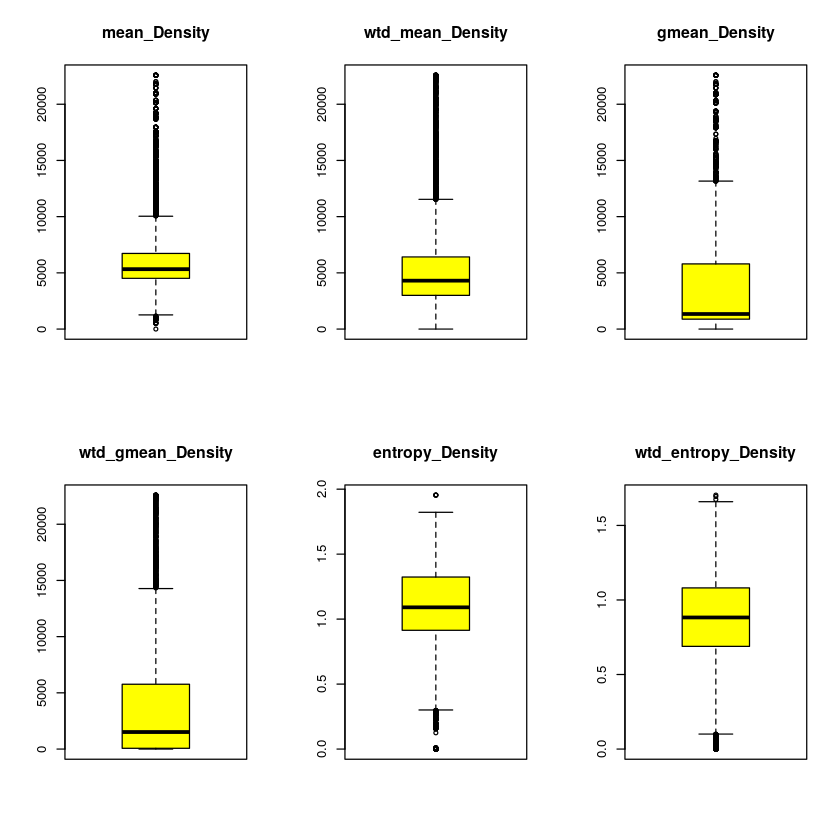

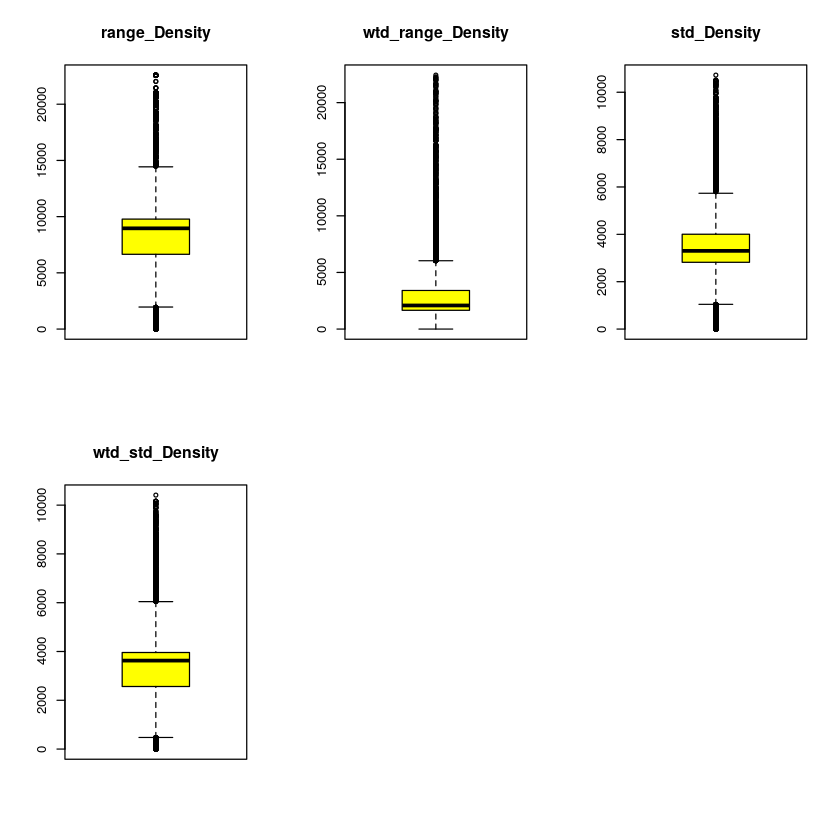

In [26]:
par(mfrow = c(2,3))
for (i in 1:(length(density_df))) {
boxplot(density_df[,i], main = names(density_df[i]), type="l", col = 'yellow')
}


* From the above box plots, it is observed that all the variables contain outliers.

* gmean_Density, range_Density, wtd_range_Density and wtd_std_Density show less variation in the data as compared to all the other variables.

* range_Density can therefore be a candidate for variable elimination.

We can understand the variable distributions of all Density features using histograms



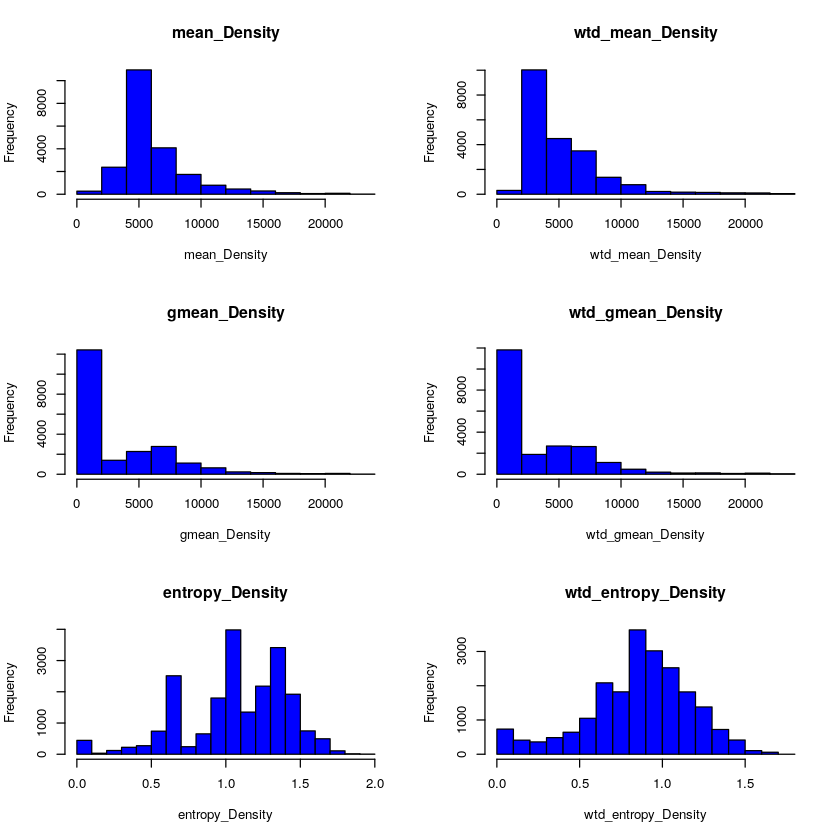

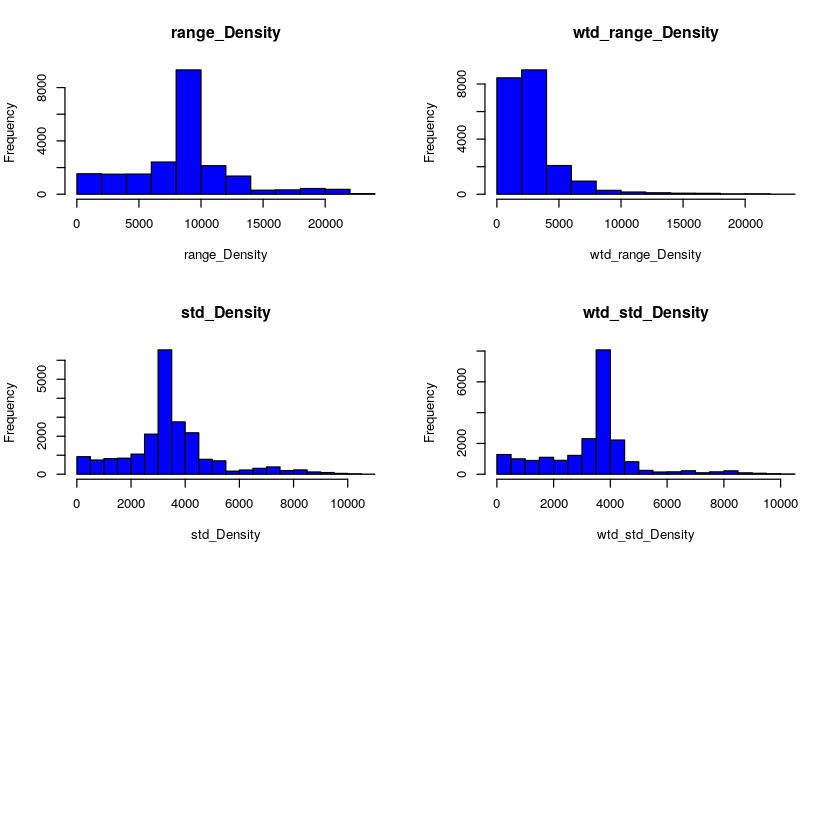

In [27]:
par(mfrow = c(3,2))
atm_col <- colnames(density_df)
for (i in 1:(length(atm_col))) {
    hist(density_df[,i], main=names(density_df[i]), xlab = names(density_df[i]), col="blue")
}


From the above distributions, we can observe the following:

* Most of the materials have mean_Density between 3000-6000 units.

* The distribution of wtd_mean_Density is right skewed with more than 8000 materials having wtd_mean_Density of 2000-4000 units.

* The ditributions of gmean_Density, wtd_range_Density and wtd_gmean_Density are also right skewed.

* The distribution of wtd_entropy_Density is normal which indicates that this feature may affect the critical temperature of the material.

Replotting wtd_mean_Density, gmean_Density, wtd_range_Density to see if the log scale has normal distribution



Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 287 rows containing non-finite values (stat_bin).”

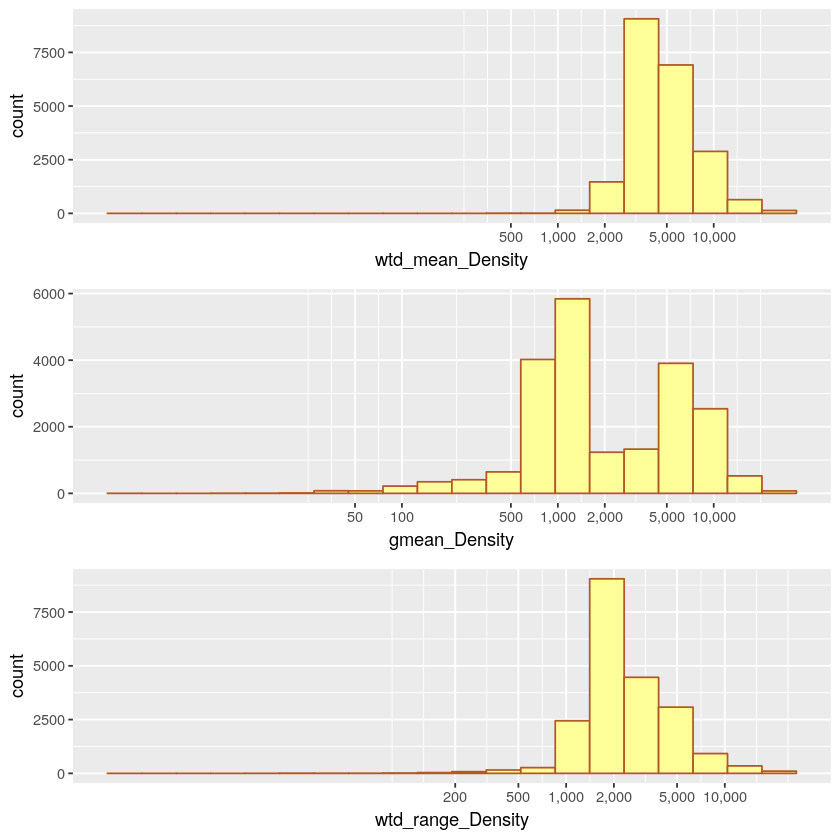

In [28]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p1 <- ggplot(aes(x=wtd_mean_Density), data=density_df) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(500,1000,2000,5000,10000))
p3 <- ggplot(aes(x=gmean_Density), data=density_df) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(50,100,500,1000,2000,5000,10000))
p4 <- ggplot(aes(x=wtd_range_Density), data=density_df) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(200, 500,1000,2000,5000,10000))
grid.arrange(p1, p3, p4, ncol=1, nrow=3)


* The log of wtd_mean_Density is not quite normal as it demonstrates a normal curve between 2000-10000 units but contains many outliers below 1000 units.

* Similarly the log distributions of gmean_Density and wtd_range_Density are not normal as they contain many outliers

Analyzing the relationship of the Density features with the critical tempearture with the help of pairwise correlation plot



In [29]:
# Renaming the variables for correlation matrix
density_df <- density_df %>% 
  rename(
    m_den = mean_Density,
    wtd_m_den = wtd_mean_Density,
    gm_den = gmean_Density,
    wtd_gm_den = wtd_gmean_Density,
    e_den = entropy_Density,
    wtd_e_den = wtd_entropy_Density,
    r_den = range_Density,
    wtd_r_den = wtd_range_Density,
    std_den = std_Density,
    wtd_std_den = wtd_std_Density
    )

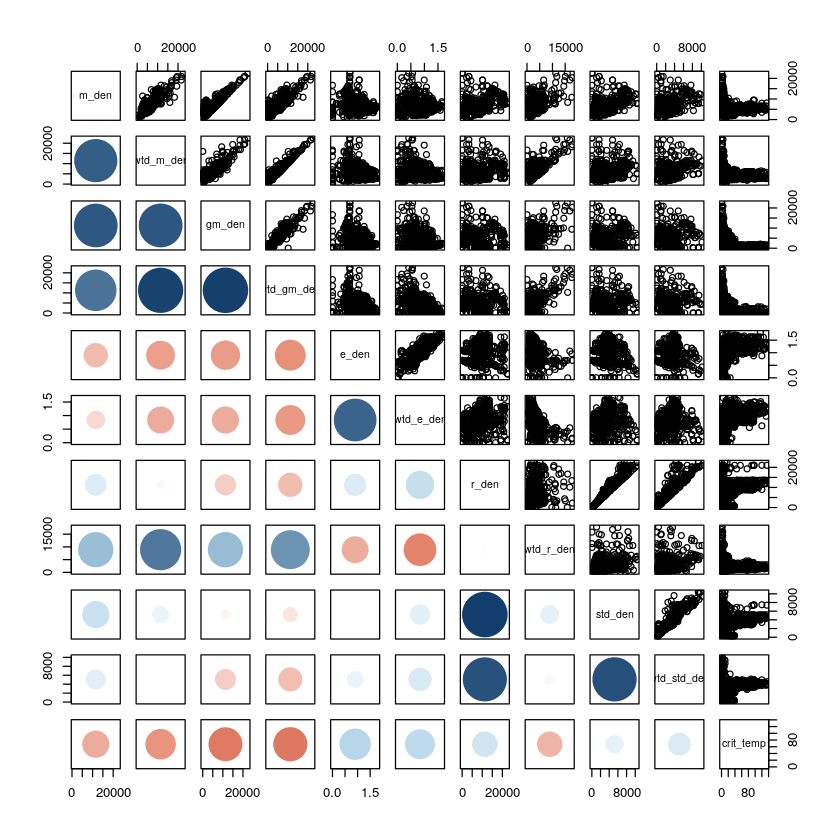

In [30]:
density_df <- cbind(density_df, crit_temp=df_train[,82])
pairs(density_df[sample.int(nrow(density_df),1000),], lower.panel=panel.cor, col="black")


In the above pairwise correlation plot, the blue dots indicate positive correlation and red dots indicate negative correlation. The size of the dots determine the intensity of the correlation.

From the above pairwise correlation plot, we can observe the following:

* wtd_mean_Density is positively correlated to wtd_gmean_Density which means that with the increase in the mean Density, the weighted geometric mean Density will also increase.

* wtd_gmean_Density is highly negatively correlated to critical temp as compared to wtd_mean_Density. Therefore, on the basis of multicollinearity wtd_mean_Density predictor can be eliminated.

* gmean_Density and wtd_gmean_Density are highly positively correlated but wtd_gmean_Density is also highly negatively correlated to critical_temp. Therefore, gmean_Density can be eliminated.

* range_Density is positively correlated to std_Density but range_Density is highly positively correlated to critical_temp. Therefore, std_Density can be eliminated.

* Similarly due to multicollinearity present between the predictors and target variable "critical_temp", predictors such as wtd_mean_Density, gmean_Density, std_Density, range_Density, wtd_gmean_Density can be eliminated.

* Therefore, variables such as mean_Density, wtd_range_Density, entropy_Density, wtd_entropy_Density and wtd_std_Density can be chosen as they seem to affect critical temperature of the material by some amount. 

From the above plot it can also be observed that entropy_Density is positively correlated to the critical_temp.

Let's have a closer view



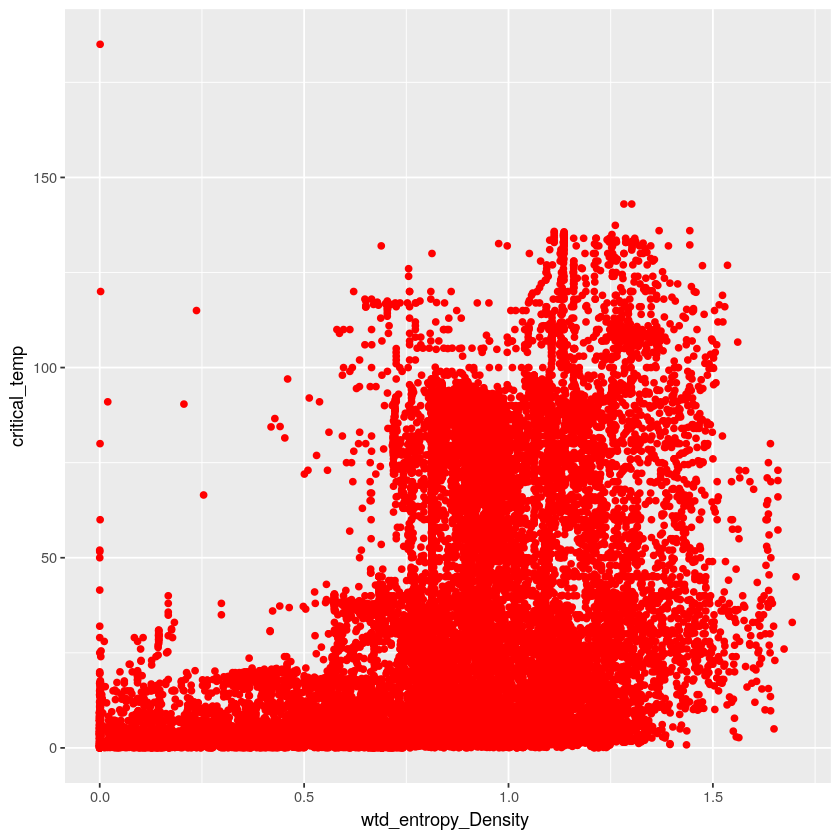

In [31]:
ggplot(data=density_df, aes(x=wtd_e_den, y=crit_temp))+ geom_point(col="red") + labs(x="wtd_entropy_Density ", y="critical_temp")



In the above graph, the X-axis represents the weighted entropy Density and the Y-axis represents the critical temperature. From the graph, it can be observed that as the weighted entropy Density of the material increases the critical temperature also increases. This indicates that wtd_entropy_Density may have some effect on the critical temperature of the superconductor.



### 2.4 Analysis of Fusion Heat features

In [32]:
fusion_heat_df <- df_train[,52:61]

In [33]:
attach(fusion_heat_df)
head(fusion_heat_df)

mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.9055,3.846857,3.479475,1.040986,1.088575,0.9949982,12.878,1.744571,4.599064,4.666920
7.7844,3.796857,4.403790,1.035251,1.374977,1.0730938,12.878,1.595714,4.473363,4.603000
6.9055,3.822571,3.479475,1.037439,1.088575,0.9274794,12.878,1.757143,4.599064,4.649635
6.9055,3.834714,3.479475,1.039211,1.088575,0.9640310,12.878,1.744571,4.599064,4.658301
6.9055,3.871143,3.479475,1.044545,1.088575,1.0449695,12.878,1.744571,4.599064,4.684014
6.9055,3.919714,3.479475,1.051699,1.088575,1.1118503,12.878,1.744571,4.599064,4.717642



The chemical property Fusion Heat has 10 features which are all numerical continuous variables.

Lets check the variable distributions with the help of box plots



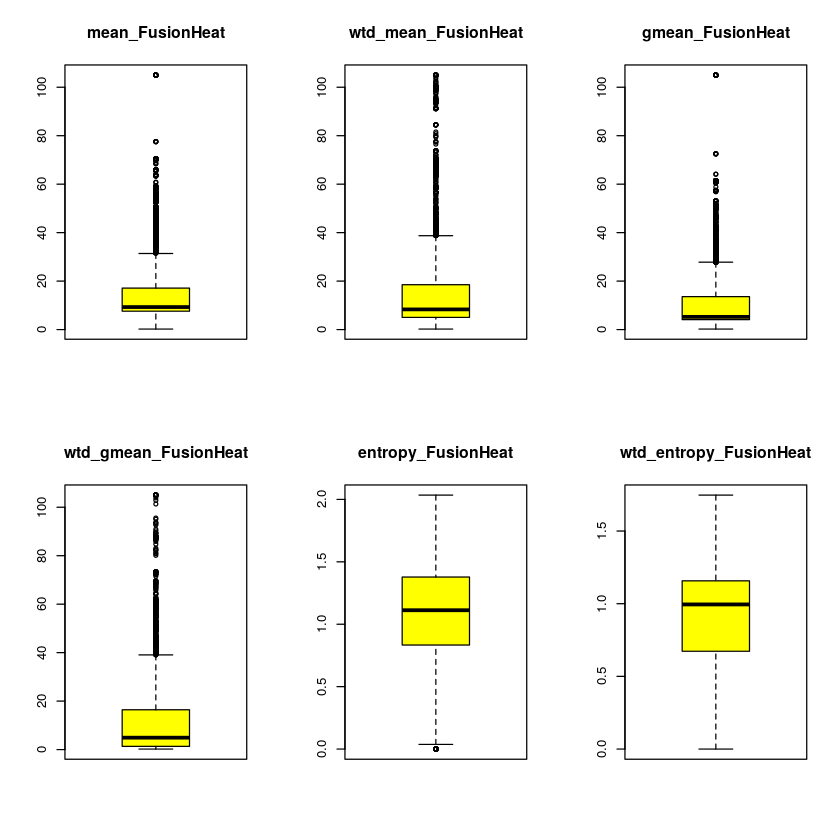

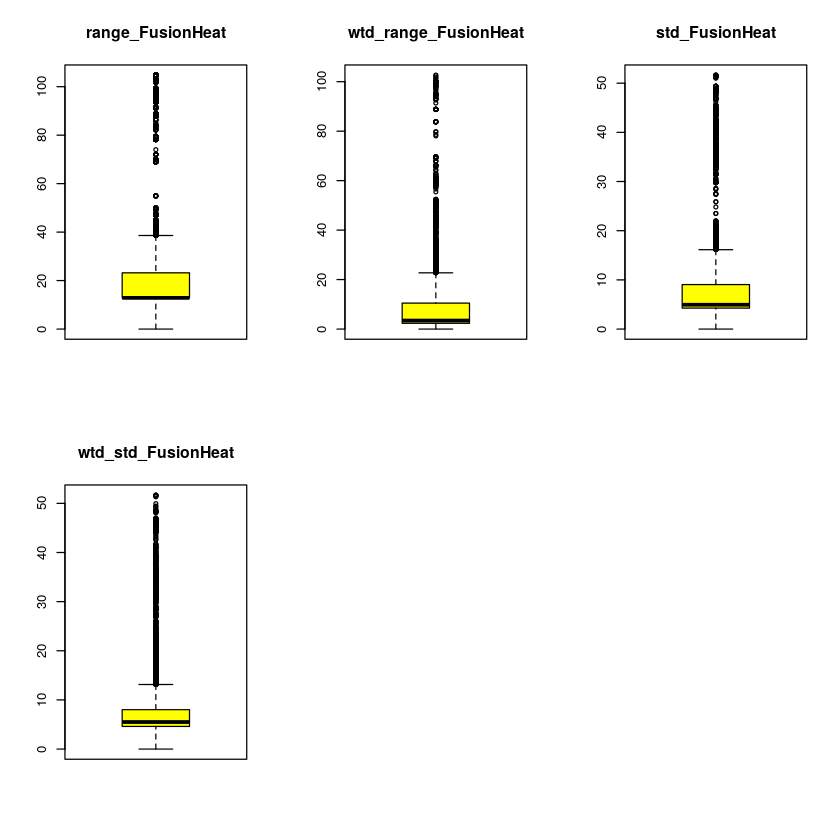

In [34]:
par(mfrow = c(2,3))
for (i in 1:(length(fusion_heat_df))) {
boxplot(fusion_heat_df[,i], main = names(fusion_heat_df[i]), type="l", col = 'yellow')
}


* From the above box plots, it is observed that all the variables contain outliers except entropy_FusionHeat and wtd_entropy_FusionHeat.

* mean_FusionHeat, gmean_FusionHeat, range_FusionHeat, wtd_range_FusionHeat and std_FusionHeat show less variation in the data as compared to all the other variables.

* The median of range_FusionHeat is also very low along with its variance and therefore, it an be a candidate for elimination.

We can understand the variable distributions of all FusionHeat features using histograms



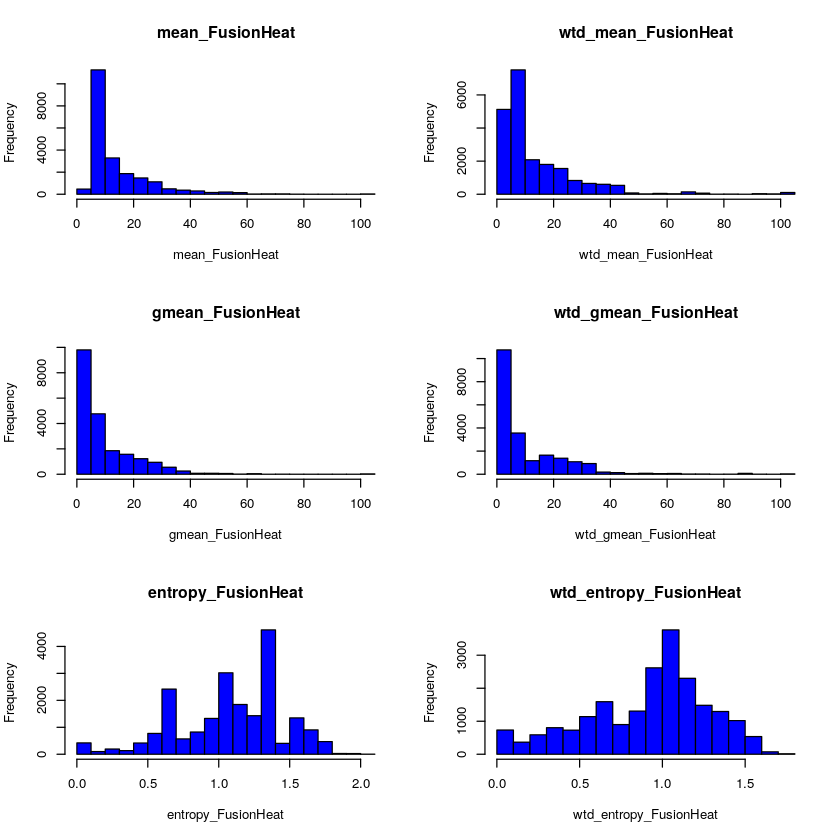

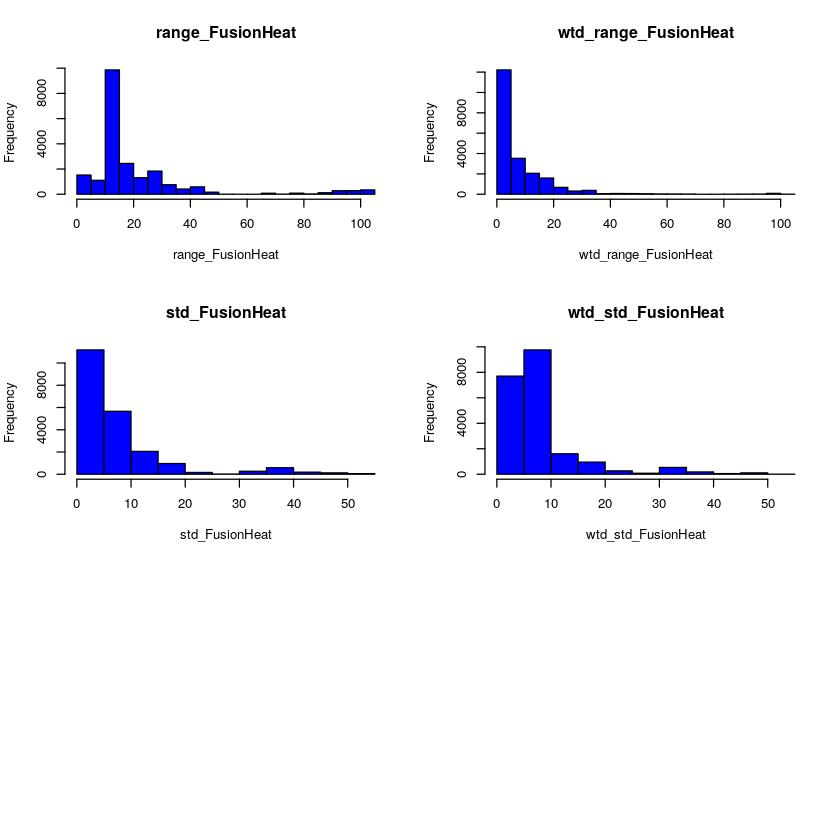

In [35]:
par(mfrow = c(3,2))
atm_col <- colnames(fusion_heat_df)
for (i in 1:(length(atm_col))) {
    hist(fusion_heat_df[,i], main=names(fusion_heat_df[i]), xlab = names(fusion_heat_df[i]), col="blue")
}



* From the above distributions, it can be observed that entropy_FusionHeat and wtd_entropy_FusionHeat are quite normally distributed.

* The distributions of all the other variables of FusionHeat are right skewed.

Analyzing the relationship of the FusionHeat features with the critical tempearture with the help of pairwise correlation plot



In [36]:
# Renaming the variables for correlation matrix
fusion_heat_df <- fusion_heat_df %>% 
  rename(
    m_fh = mean_FusionHeat,
    wtd_m_fh = wtd_mean_FusionHeat,
    gm_fh = gmean_FusionHeat,
    wtd_gm_fh = wtd_gmean_FusionHeat,
    e_fh = entropy_FusionHeat,
    wtd_e_fh = wtd_entropy_FusionHeat,
    r_fh = range_FusionHeat,
    wtd_r_fh = wtd_range_FusionHeat,
    std_fh = std_FusionHeat,
    wtd_std_fh = wtd_std_FusionHeat
    )

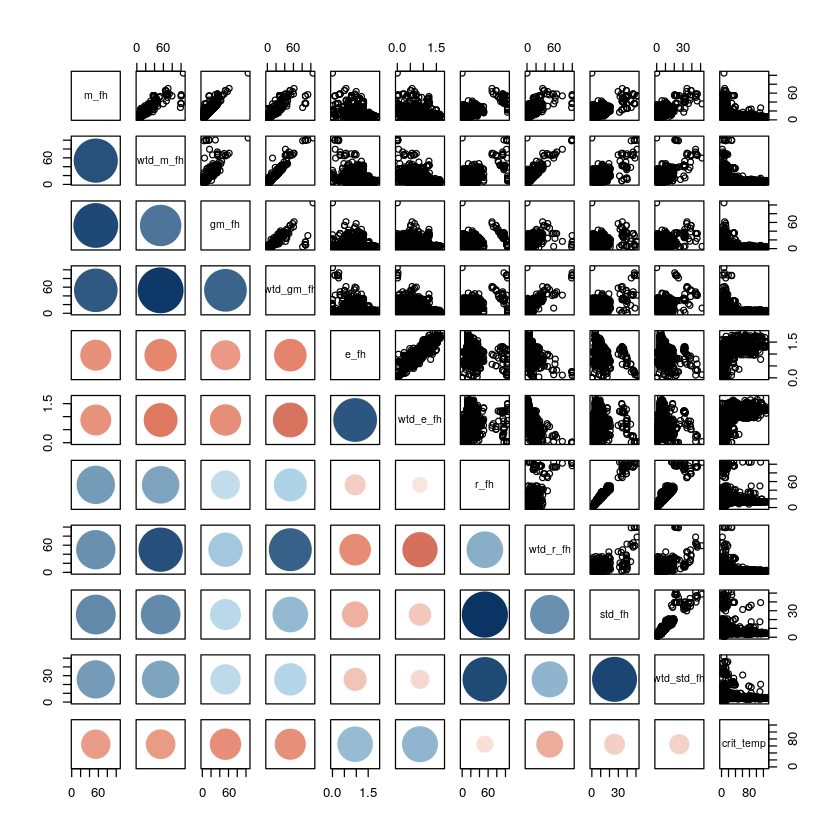

In [37]:
fusion_heat_df <- cbind(fusion_heat_df, crit_temp=df_train[,82])
pairs(fusion_heat_df[sample.int(nrow(fusion_heat_df),1000),], lower.panel=panel.cor, col="black")


In the above pairwise correlation plot, the blue dots indicate positive correlation and red dots indicate negative correlation. The size of the dots determine the intensity of the correlation.

From the above pairwise correlation plot, we can observe the following:

* mean_FusionHeat is positively correlated to wtd_mean_FusionHeat which means that with the increase in the mean Density, the weighted mean FusionHeat will also increase.

* mean_FusionHeat is highly negatively correlated to critical temp as compared to wtd_mean_FusionHeat. Therefore, on the basis of multicollinearity wtd_mean_FusionHeat predictor can be eliminated.

* gmean_FusionHeat and wtd_gmean_FusionHeat are highly positively correlated but wtd_gmean_FusionHeat is also highly negatively correlated to critical_temp. Therefore, gmean_FusionHeat can be eliminated.

* entropy_FusionHeat is positively correlated to wtd_entropy_FusionHeat but wtd_entropy_FusionHeat is highly positively correlated to critical_temp. Therefore, entropy_FusionHeat can be eliminated.

* Similarly due to multicollinearity present between the predictors and target variable "critical_temp", predictors such as wtd_mean_FusionHeat, gmean_FusionHeat, entropy_FusionHeat, wtd_entropy_FusionHeat, wtd_std_FusionHeat can be eliminated.

* Therefore, variables such as mean_FusionHeat, wtd_range_FusionHeat, and std_FusionHeat can be chosen as they seem to affect critical temperature of the material by some amount.

From the above plot it can also be observed that mean_FusionHeat is negatively correlated to the critical_temp.

Let's have a closer view



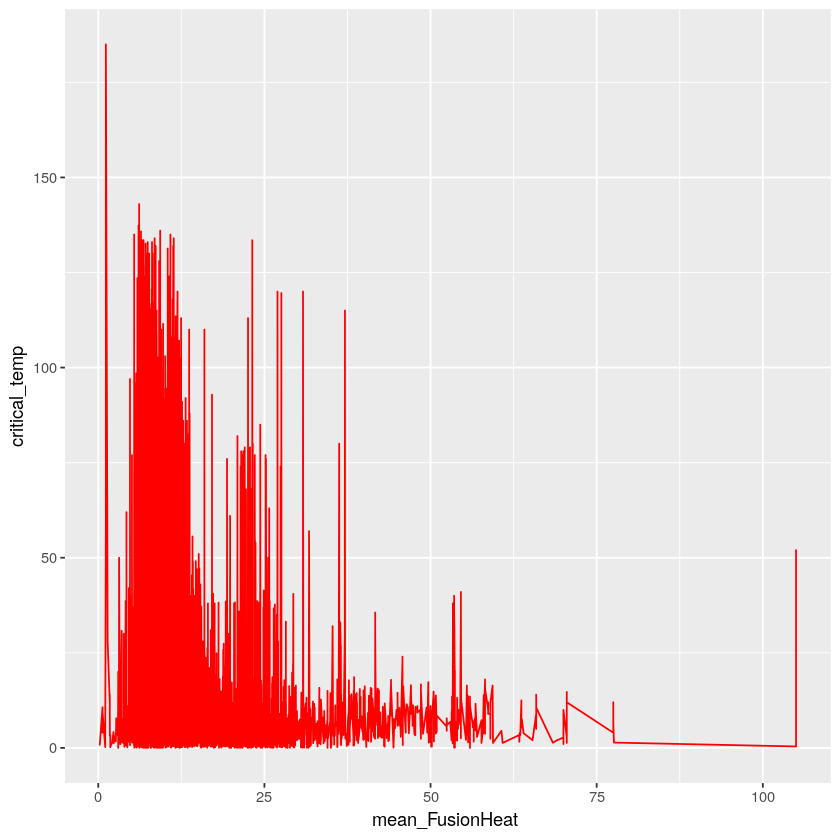

In [38]:
ggplot(data=fusion_heat_df, aes(x=m_fh, y=crit_temp))+ geom_line(col="red") + labs(x="mean_FusionHeat ", y="critical_temp")



* In the above graph, the X-axis represents the mean_FusionHeat and Y-axis represents the critical_temp. Fusion heat of a superconducting material is the energy to change the state of the material from solid to liquid without changing the temperature. From the graph, it can be observed that as the mean_FusionHeat increases the critical temperature of the material decreases. As the energy to change the state increases which does not affect the temperature so this change of phase can take place at low temperatures and therefore, this trend might be observed in the superconducting material.


* From the above analysis of Atomic mass, Atomic Radius, Density and Fusion Heat properties of semiconductors the variables such as gmean_atomic_mass, wtd_std_atomic_mass, range_atomic_mass, wtd_gmean_atomic_mass, entropy_atomic_mass, gmean_atomic_radius, wtd_mean_atomic_radius, entropy_atomic_radius, wtd_std_atomic_radius, range_atomic_radius, wtd_entropy_atomic_radius, wtd_mean_Density, gmean_Density, std_Density, range_Density, wtd_gmean_Density, wtd_mean_FusionHeat, gmean_FusionHeat, entropy_FusionHeat, wtd_entropy_FusionHeat, wtd_std_FusionHeat, range_FusionHeat can be candidates for variable elimination due to multicollinearity and low variance.



## 3. Variable Identification and Explanation


From the above EDA it is evident that from 82 variables in the given dataset not all variables contribute towards predicting the critical temperature of the superconducting material.

We will be validating our intuition of non-informative predictors chosen for elimination through EDA with the help of R functions and discard them while building the model. This will allow us to build a model with greater accuracy and transparency.

We can achieve the identification of non-informative predictors using the following methods:

* Identifying variables with zero variance and eliminating them

* Identifying variables with high collinearity and eliminating them 



### 3.1 Identifying variables with zero variance and eliminating them

This helps to identify those variables with less variation in the data and less unique values as compared to the sample size.

In [39]:
# identifying variables with near zero variance
near_zero_variance <- nearZeroVar(df_train, saveMetrics = TRUE, freqCut = 2,uniqueCut = 10)


In the near_zero_variance dataframe, the 4th column indicates whether the variable has near zero variance or not.

We extract all the variables with near zero variance



In [40]:
nzv.true <- near_zero_variance[which(near_zero_variance$nzv == TRUE),]
nzv.true

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
range_fie,3.009630,4.016366,FALSE,TRUE
range_Density,4.236315,4.185675,FALSE,TRUE
range_FusionHeat,13.076923,2.798288,FALSE,TRUE
range_ThermalConductivity,23.316854,2.125758,FALSE,TRUE



From the EDA for Atomic Radius and Fusion Heat we had chosen range_Density and range_FusionHeat as candidates for elimination which proves true from the above table.

Let's explore range_fie and range_ThermalConductivity through boxplots



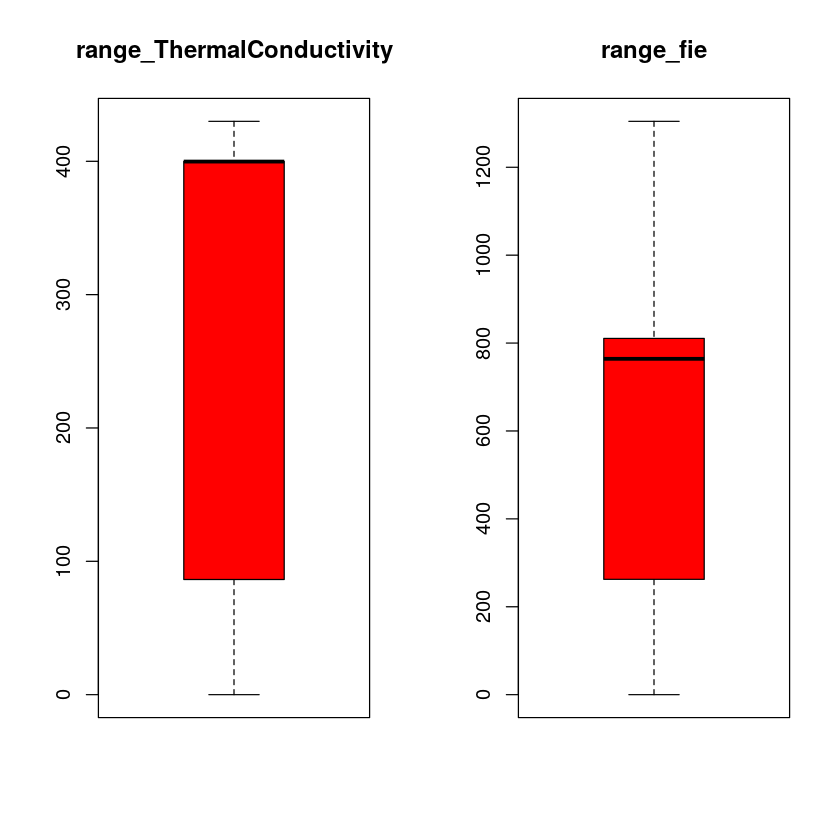

In [41]:
par(mfrow = c(1,2))
boxplot(df_train[,'range_ThermalConductivity'], main = 'range_ThermalConductivity', type="l", col = 'red')
boxplot(df_train[,'range_fie'], main = 'range_fie', type="l", col = 'red')


From the above boxplots, it is observed that the median which shows the variablity in the data is skewed. It also indicates that most of the data values in the sample data are identical and therefore, these variables have low variance.



Discarding all such near zero variance variables from the data for further analysis

In [42]:
filtered_variables <- near_zero_variance[which(near_zero_variance$nzv == FALSE),]
filtered_data <- df_train[rownames(filtered_variables)]

In [43]:
dim(filtered_data)

[1] 21263    78

The dimension of the filtered data indicates that out of 82 variables we have eliminated 4 variables on the basis of low variance.

### 3.2 Identifying variables with high collinearity and eliminating them

Here we determine the pairwise correlation between the variables and eliminate those with the highest collinearity

In [44]:
# pairwise correlation for the filtered variables
correlation_mat <- cor(filtered_data[ , 1:78])
cor_ <- as.data.frame.table(correlation_mat)
colnames(cor_) <- c("a", "b", "cor")
cor_ <- cor_[cor_$a != cor_$b, ]
cor_ <- cor_[order(abs(cor_$cor), decreasing = TRUE), ]
cor_ <- cor_[seq(1, nrow(cor_), 2), ]
cor_$cor <- round(cor_$cor, 2)
rownames(cor_) <- 1:nrow(cor_)
print(cor_[1:10, ])

                         a                      b  cor
1    entropy_atomic_radius            entropy_fie 1.00
2        wtd_gmean_Valence       wtd_mean_Valence 0.99
3          entropy_Valence            entropy_fie 0.99
4            wtd_gmean_fie           wtd_mean_fie 0.99
5            gmean_Valence           mean_Valence 0.99
6          entropy_Valence  entropy_atomic_radius 0.99
7  wtd_gmean_atomic_radius wtd_mean_atomic_radius 0.98
8              std_Valence          range_Valence 0.97
9              entropy_fie     number_of_elements 0.97
10    std_ElectronAffinity range_ElectronAffinity 0.97


In [45]:
cor_matrix_critical_temp <- cor_[which(cor_$a == 'critical_temp'),]
cor_matrix_critical_temp[order(cor_matrix_critical_temp$cor, decreasing = TRUE), ]

,a,b,cor
,<fct>,<fct>,<dbl>
233,critical_temp,wtd_std_ThermalConductivity,0.72
353,critical_temp,range_atomic_radius,0.65
355,critical_temp,std_ThermalConductivity,0.65
410,critical_temp,wtd_entropy_atomic_mass,0.63
471,critical_temp,wtd_entropy_atomic_radius,0.60
478,critical_temp,number_of_elements,0.60
483,critical_temp,wtd_std_atomic_radius,0.60
485,critical_temp,entropy_Valence,0.60
510,critical_temp,wtd_entropy_Valence,0.59



From the above pairwise correlation coefficient between the different predictors and target variable i.e, critical_temp, the correlation coefficients are all below 0.85



In [46]:
summary(correlation_mat[upper.tri(correlation_mat)])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.91426 -0.26366  0.04554  0.06660  0.38341  0.99774 


From the above summary it is observed that more than 50% of the variables have the absolute correlation coefficient between 0-0.9. Thus, the cut-off used for eliminating highly correlated variables is 0.85


In [47]:
# determining highly correlated variables
highCor <- findCorrelation(correlation_mat, cutoff = 0.85, verbose = TRUE)

Compare row 20  and column  27 with corr  0.887 
  Means:  0.513 vs 0.343 so flagging column 20 
Compare row 26  and column  72 with corr  0.919 
  Means:  0.509 vs 0.338 so flagging column 26 
Compare row 27  and column  30 with corr  0.958 
  Means:  0.499 vs 0.334 so flagging column 27 
Compare row 30  and column  19 with corr  0.859 
  Means:  0.485 vs 0.33 so flagging column 30 
Compare row 72  and column  73 with corr  0.911 
  Means:  0.477 vs 0.325 so flagging column 72 
Compare row 73  and column  16 with corr  0.908 
  Means:  0.469 vs 0.321 so flagging column 73 
Compare row 16  and column  7 with corr  0.892 
  Means:  0.462 vs 0.317 so flagging column 16 
Compare row 7  and column  1 with corr  0.882 
  Means:  0.455 vs 0.313 so flagging column 7 
Compare row 34  and column  33 with corr  0.952 
  Means:  0.463 vs 0.309 so flagging column 34 
Compare row 19  and column  29 with corr  0.876 
  Means:  0.452 vs 0.305 so flagging column 19 
Compare row 1  and column  25 with 

In [48]:
highCor.variables <- colnames(correlation_mat[,highCor])
print(paste0("length of highly correlated variables:",length(highCor.variables)))
highCor.variables

[1] "length of highly correlated variables:44"


[1] "wtd_std_fie"                  "wtd_entropy_atomic_radius"   
 [3] "range_atomic_radius"          "wtd_std_atomic_radius"       
 [5] "entropy_Valence"              "wtd_entropy_Valence"         
 [7] "entropy_fie"                  "wtd_entropy_atomic_mass"     
 [9] "wtd_gmean_Density"            "std_fie"                     
[11] "number_of_elements"           "entropy_atomic_radius"       
[13] "gmean_Density"                "wtd_gmean_Valence"           
[15] "wtd_mean_Valence"             "entropy_atomic_mass"         
[17] "wtd_std_ThermalConductivity"  "wtd_entropy_FusionHeat"      
[19] "wtd_gmean_atomic_radius"      "mean_Valence"                
[21] "entropy_FusionHeat"           "wtd_mean_fie"                
[23] "wtd_mean_Density"             "wtd_mean_atomic_radius"      
[25] "range_atomic_mass"            "wtd_gmean_atomic_mass"       
[27] "wtd_entropy_fie"              "wtd_gmean_FusionHeat"        
[29] "gmean_FusionHeat"             "gmean_ThermalConductivity"   
[31] "wtd_std_atomic_mass"          "range_ElectronAffinity"      
[33] "wtd_std_ElectronAffinity"     "wtd_mean_FusionHeat"         
[35] "gmean_atomic_mass"            "gmean_atomic_radius"         
[37] "wtd_mean_ElectronAffinity"    "std_Density"                 
[39] "gmean_fie"                    "mean_ElectronAffinity"       
[41] "wtd_std_FusionHeat"           "wtd_mean_ThermalConductivity"
[43] "wtd_std_Valence"              "std_Valence"



**findCorrelation** function in R identifies the pairs of variables with pairwise correlation greater than 0.85

We can observe that the function has identified 44 variables for elimination. The variables chosen for elimination at the time of EDA also match the above set of variables.  

We will eliminate these variables as retaining both the pairs will cancel out the effect on the target variable.



In [49]:
filtered.var <- colnames(filtered_data)
filtered.var <- filtered.var[!is.element(filtered.var, highCor.variables)]
length(filtered.var)

[1] 34


After eliminating the variables on the basis of variance and high collinearity we are left with 34 variables that may have some effect on the target variable.



Dimension reduction can be further achieved using backward stepwise selection

Applying backward selection on the filtered data


In [50]:
filtered_data <- filtered_data[filtered.var]
regfit.bwd <- regsubsets(filtered_data$critical_temp ~ ., data = filtered_data, nvmax = 50, method = "backward" )
reg.summary.bwd <- summary(regfit.bwd)

In [51]:
cat("Cp - ",which.min(reg.summary.bwd$cp),"\n")
cat("BIC - ",which.min(reg.summary.bwd$bic),"\n")
cat("Adjusted R^2 - ",which.max(reg.summary.bwd$adjr2),"\n")

Cp -  29 
BIC -  27 
Adjusted R^2 -  31 


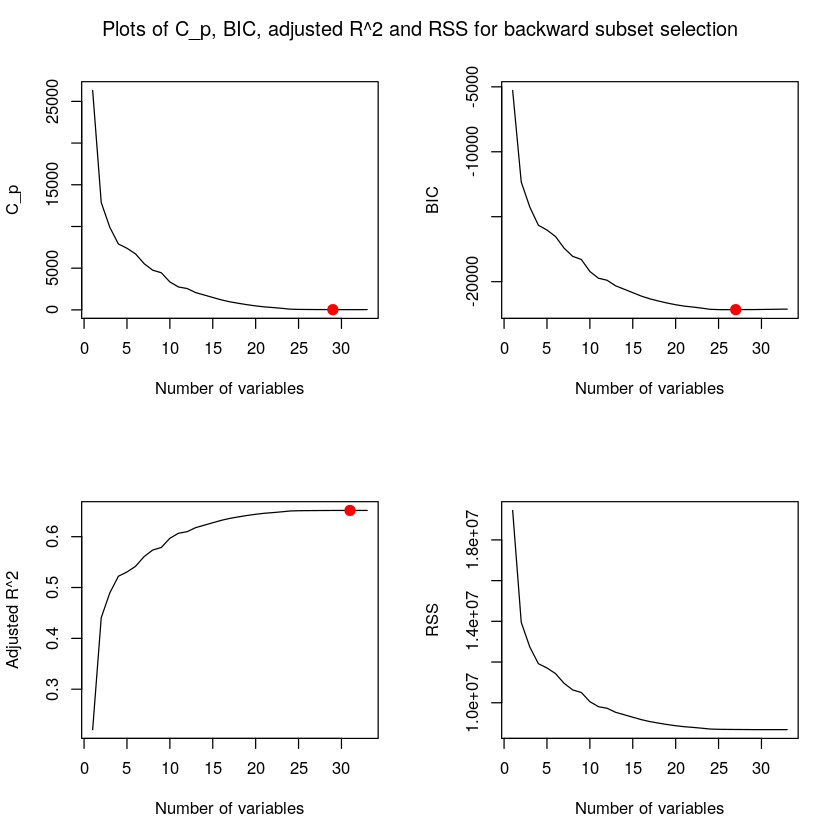

In [52]:
par(mfrow = c(2, 2))
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward subset selection", side = 3, line = -2, outer = TRUE)


The backward selection method provides 3 different models with different predictors based on different measuring parameters. To build an accurate model we will have to choose a model with low test error.

* We can observe that the Adjusted R^2 gives the highest number of predictors. This may be observed as the Adjusted R^2 increases with increase in the number of variables with low RSS. This model may fit the training data perfectly but will fail to fit the test data. Therefore, training error cannot be a good estimate for the test error. It is possible that instead of decreasing the test error may increase with the increase in the number of variables. Therefore, Adjusted R^2 is not a good parameter for choosing the model.    

* BIC tends to select the model with smallest value and low test error. It achieves this by applying heavy penalities on the models with large number of observations. BIC uses the log term which allows it to choose a better model than Cp [3].

* Therefore, we will be choosing a model on the basis of the BIC value which is the least i.e, 27 in our case.

Retrieving the predictors selected by the BIC model

In [53]:
coef(regfit.bwd, which.min(reg.summary.bwd$bic))

(Intercept)                mean_atomic_mass 
                  -78.138566509                     0.216724228 
          wtd_range_atomic_mass                 std_atomic_mass 
                   -0.239228653                     0.288643074 
                       mean_fie                   wtd_gmean_fie 
                    0.102126971                    -0.034442535 
             mean_atomic_radius         wtd_range_atomic_radius 
                    0.214109400                    -0.111789240 
              std_atomic_radius                    mean_Density 
                    0.220906397                    -0.003464003 
            wtd_entropy_Density               wtd_range_Density 
                    4.656873379                     0.003186261 
                wtd_std_Density      wtd_gmean_ElectronAffinity 
                   -0.002625362                    -0.096558617 
       entropy_ElectronAffinity    wtd_entropy_ElectronAffinity 
                   16.058341540                   -42.155609940 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                   -0.209037848                     0.143718197 
                mean_FusionHeat                  std_FusionHeat 
                    0.218528077                    -0.550774747 
       mean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                    0.212694137                    -0.302795293 
    entropy_ThermalConductivity wtd_entropy_ThermalConductivity 
                   12.970654115                    13.784744379 
  wtd_range_ThermalConductivity         std_ThermalConductivity 
                    0.245703507                     0.042785339 
                  gmean_Valence                   range_Valence 
                    1.478080201                    -3.226231676



* The backward stepwise selection method has provided 27 most important features affecting the critical temperature of the superconducting material. The predictors are as follows:

"mean_atomic_mass","wtd_range_atomic_mass","std_atomic_mass","mean_fie","wtd_gmean_fie","mean_atomic_radius",
"wtd_range_atomic_radius","std_atomic_radius","mean_Density","wtd_entropy_Density","wtd_range_Density",
"wtd_std_Density","wtd_gmean_ElectronAffinity","entropy_ElectronAffinity","wtd_entropy_ElectronAffinity",
"wtd_range_ElectronAffinity","std_ElectronAffinity","mean_FusionHeat","std_FusionHeat",
"mean_ThermalConductivity","wtd_gmean_ThermalConductivity","entropy_ThermalConductivity",
"wtd_entropy_ThermalConductivity","wtd_range_ThermalConductivity","std_ThermalConductivity",
"gmean_Valence","range_Valence"

* We will be using these features for building statistical models and comparing the accuracy of the models.



## 4. Model Development

We will be building different statistical models on the superconductor data using the features selected by the backward stepwise selection method.

As the target variable in the superconductor data i.e., critical_temp is a numerical continuous variable, we will be analysing different regression models.


In [54]:
# Features provided by backward stepwise selection
selected_reduced_var <- c("mean_atomic_mass","wtd_range_atomic_mass","std_atomic_mass","mean_fie","wtd_gmean_fie","mean_atomic_radius","wtd_range_atomic_radius","std_atomic_radius","mean_Density","wtd_entropy_Density","wtd_range_Density","wtd_std_Density","wtd_gmean_ElectronAffinity","entropy_ElectronAffinity","wtd_entropy_ElectronAffinity","wtd_range_ElectronAffinity","std_ElectronAffinity","mean_FusionHeat","std_FusionHeat","mean_ThermalConductivity","wtd_gmean_ThermalConductivity","entropy_ThermalConductivity","wtd_entropy_ThermalConductivity","wtd_range_ThermalConductivity","std_ThermalConductivity","gmean_Valence","range_Valence","critical_temp")

Filtering the given dataset based on the selected features

In [55]:
filter_data <- df_train[selected_reduced_var]

Sampling the dataset into training and test data with 80% train data and 20% test data.

In [56]:
sample_size <- floor(0.80 * nrow(filter_data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(filter_data)), size = sample_size)

train <- filter_data[train_ind, ]
test <- filter_data[-train_ind, ]

In [59]:
dim(train)

[1] 17010    28

We can observe that the training data has 17010 rows with 28 columns

In [60]:
dim(test)

[1] 4253   28

We can observe that the test data has 4253 rows with 28 columns

### 4.1 Multiple Linear Regression

Fitting the linear regression model on the training data

In [57]:
fit1 <- lm(critical_temp ~ ., data=train)
summary(fit1)


Call:
lm(formula = critical_temp ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-133.288  -12.609   -0.441   12.817  185.090 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -7.840e+01  5.034e+00 -15.575  < 2e-16 ***
mean_atomic_mass                 2.242e-01  1.441e-02  15.557  < 2e-16 ***
wtd_range_atomic_mass           -2.420e-01  1.452e-02 -16.664  < 2e-16 ***
std_atomic_mass                  2.945e-01  1.415e-02  20.810  < 2e-16 ***
mean_fie                         1.017e-01  4.781e-03  21.272  < 2e-16 ***
wtd_gmean_fie                   -3.493e-02  3.671e-03  -9.514  < 2e-16 ***
mean_atomic_radius               2.136e-01  1.736e-02  12.302  < 2e-16 ***
wtd_range_atomic_radius         -1.063e-01  8.964e-03 -11.854  < 2e-16 ***
std_atomic_radius                2.223e-01  1.876e-02  11.851  < 2e-16 ***
mean_Density                    -3.554e-03  1.913e-04 -18.581  < 2e-16 ***
wtd

The adjusted R-squared ( 𝑅2 ) value indicates this model explains 65.1% of the variation in critical temperature.

The F-statistic 1176 has a p-value < 2.2e-16, so we can reject the null hypothesis (the model explains nothing) and accept the alternative which indicates that the model is useful.

The p-values for the coefficients show all the variables are significant at the 0.05 level.

Lets check the residuals using the plot function

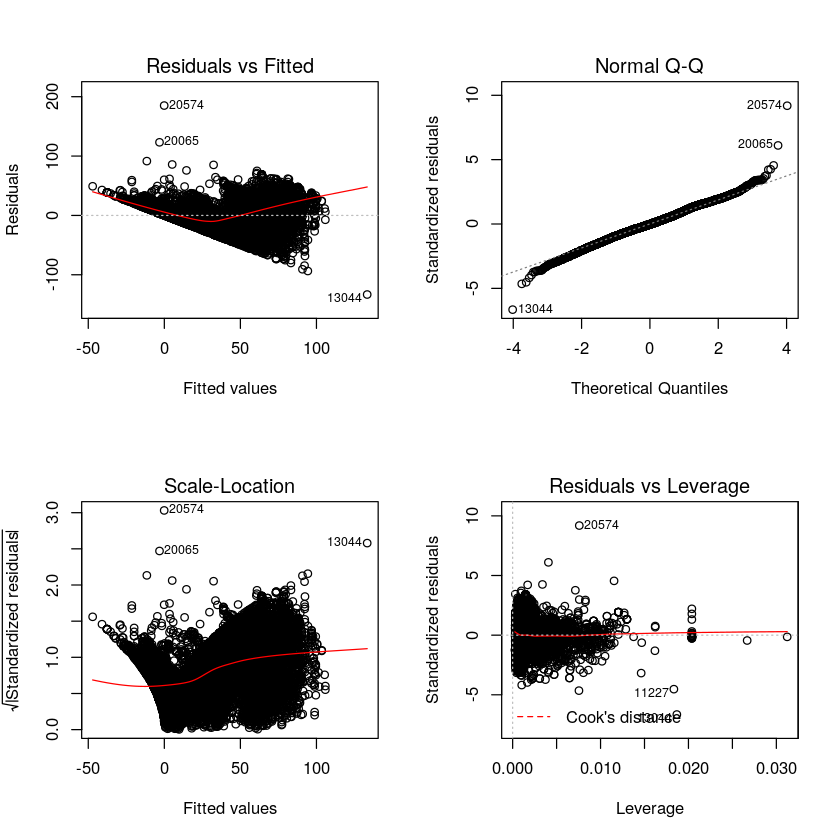

In [58]:
par(mfrow=c(2,2))
plot(fit1)


From the above plots, we can observe the following:

* Residual vs Fitted - In this graph the residuals are not scattered evenly and there is a pattern observed which indicates that the relationship between the predictors and the response variable critical_temp is non-linear.

* Normal Q-Q - In the linear regression, we assume that the residuals are normally distributed with constant variance. This is validated using the Q-Q plot. The above Q-Q plot shows that most of the residuals follow the linear line but there are some outliers. This indicates that the residuals are normally distributed.

* Scale-Location - The graph shows the model violates the assumption of equal variance

* Residuals vs Leverage - The graph shows that all the data values are well inside the Cook's distance line which indicates that there are no influential outliers.


In [61]:
glance(fit1) %>%
  dplyr::select(adj.r.squared, sigma, AIC, BIC, p.value)

adj.r.squared,sigma,AIC,BIC,p.value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6510073,20.22236,150593.2,150817.7,0



From the above table we can observe that for multiple linear regression model the **AIC** observed is **150593** and **BIC** observed is **150817**

Predicting critical temperatures of the test data


In [62]:
pred_mod1 <- predict(fit1,test)

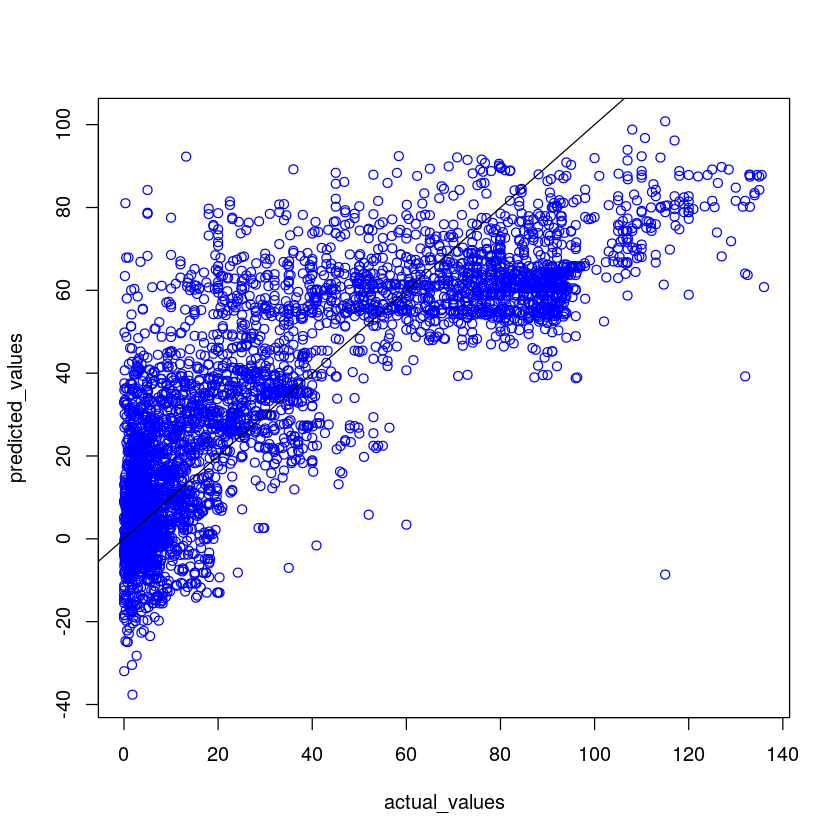

In [63]:
plot(test$critical_temp,pred_mod1, col="blue", xlab="actual_values",ylab="predicted_values")
abline(a=0,b=1)


In the above graph, the X-axis represents actual values for critical temperature while Y-axis represents the predicted values of the critical temperature. It is observed that the predited values and observed values do not follow the linear regression line which indicates that linear model does not predict the test data accurately. It only predicts 65% of the variation in the data correctly.


In [64]:
print(paste0("Linear regression model MSE:", mean((test$critical_temp-pred_mod1)^2)))
print(paste0("Linear regression model RMSE:", RMSE(pred_mod1, test$critical_temp)))

[1] "Linear regression model MSE:410.123070773668"
[1] "Linear regression model RMSE:20.2514955194343"


The observed **MSE** for the linear model is **410.12** and the observed **RMSE** for the linear model is **20.25**

### 4.2 Lasso

Fitting the data to the Lasso model

In order to fit the lasso model to the data we convert the training and test data to corresponding matrices.

In [65]:
train.mat <- model.matrix(critical_temp ~ ., data = train)[,-28]
test.mat <- model.matrix(critical_temp ~ ., data = test)[,-28]

We generate a list of lambda values that will be used in cross-validation. With the generated list of possible lambda values, we fit the lasso model

In [66]:
grid <- 10^seq(4, -2, length = 100)

The alpha is set to 1 for the lasso model and by default the cross validation uses 10 folds

In [67]:
set.seed(1)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.lasso <- glmnet(train.mat, train$critical_temp, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, train$critical_temp, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

The best cross-validated lambda value is **0.01**. Using this value we will predict the test data over the lasso model

In [68]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)

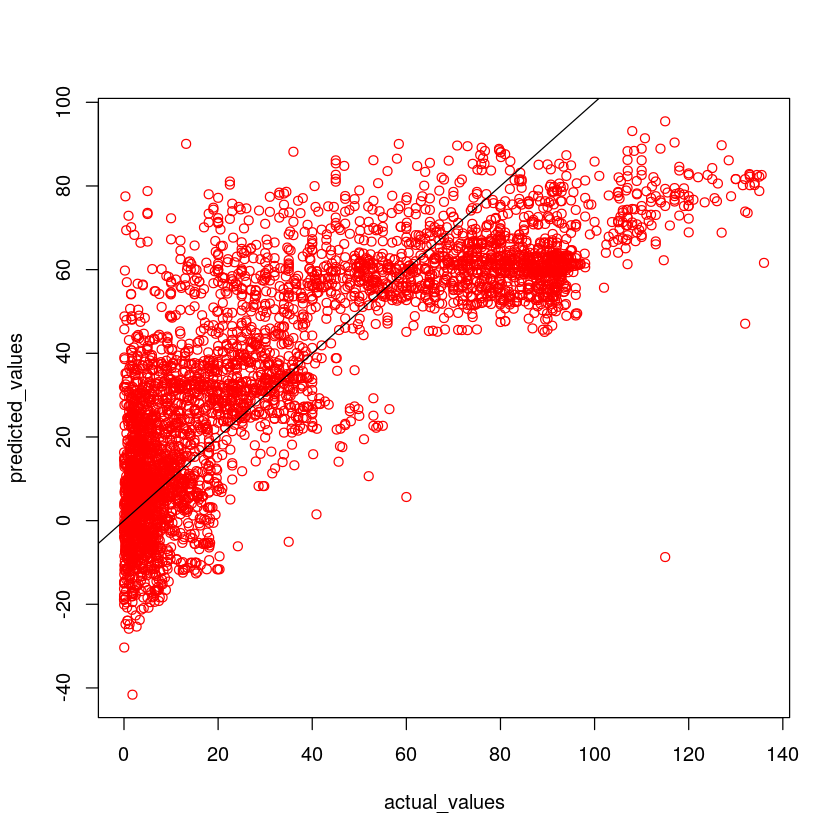

In [69]:
plot(test$critical_temp,pred.lasso, col="red", xlab="actual_values",ylab="predicted_values")
abline(a=0,b=1)


In the above graph, the X-axis represents actual values for critical temperature while Y-axis represents the predicted values of the critical temperature. It is observed that the predited values and observed values do not follow the linear regression line which indicates that Lasso model performs similar to the linear model and it covers only 64% of variations in the data.


In [70]:
print(paste0("Lasso model MSE:",mean((test$critical_temp - pred.lasso)^2)))
print(paste0("Lasso model RMSE:", RMSE(pred.lasso, test$critical_temp)))
print(paste0("Lasso model R^2:", R2(pred.lasso, test$critical_temp, form = "traditional")))

[1] "Lasso model MSE:421.305009140453"
[1] "Lasso model RMSE:20.5257158009277"
[1] "Lasso model R^2:0.642838762203165"


The observed **MSE** for the Lasso model is **421.30**

The observed **RMSE** for the Lasso model is **20.52**

The observed **R^2** for the Lasso model is **0.6428**

In [71]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")[1:28, ]

(Intercept)                     (Intercept) 
                  -86.091449029                     0.000000000 
               mean_atomic_mass           wtd_range_atomic_mass 
                    0.251091098                    -0.261214249 
                std_atomic_mass                        mean_fie 
                    0.286599720                     0.105501391 
                  wtd_gmean_fie              mean_atomic_radius 
                   -0.036793054                     0.227340846 
        wtd_range_atomic_radius               std_atomic_radius 
                   -0.094686183                     0.245793022 
                   mean_Density             wtd_entropy_Density 
                   -0.003763934                     5.446459967 
              wtd_range_Density                 wtd_std_Density 
                    0.003278478                    -0.002882830 
     wtd_gmean_ElectronAffinity        entropy_ElectronAffinity 
                   -0.073699508                     7.034200526 
   wtd_entropy_ElectronAffinity      wtd_range_ElectronAffinity 
                  -40.239336808                    -0.222404175 
           std_ElectronAffinity                 mean_FusionHeat 
                    0.087731279                     0.294775389 
                 std_FusionHeat        mean_ThermalConductivity 
                   -0.605835154                     0.205507377 
  wtd_gmean_ThermalConductivity     entropy_ThermalConductivity 
                   -0.306957041                    18.393869216 
wtd_entropy_ThermalConductivity   wtd_range_ThermalConductivity 
                    8.818840513                     0.235197374 
        std_ThermalConductivity                   gmean_Valence 
                    0.089852054                     1.771016653



Fitting the Lasso model did not reduce any features and showed that all the existing selected features are significant.



### 4.3 XGBoost - Extreme Gradient Boosting

* XGBoost is a gradient boosting method that can be applied to linear as well as classification type of data.

* XGBoost uses the sequential decision trees to predict the values which makes it 10 times faster than all the other models.

We will be fitting the data to the xgboost model

In [72]:
set.seed(123)
## Model parameters trained using xgb.cv function
xgbFit <- xgboost(data = as.matrix(train[, -28]), nfold = 5, label = as.matrix(train$critical_temp), 
    nrounds = 2200, verbose = FALSE, objective = "reg:linear", eval_metric = "rmse", 
    nthread = 8, eta = 0.01, gamma = 0.0468, max_depth = 6, min_child_weight = 1.7817, silent = 0,
    subsample = 0.5213, colsample_bytree = 0.4603)

In [73]:
preds.xgb <- predict(xgbFit, newdata = as.matrix(test[, -28]))

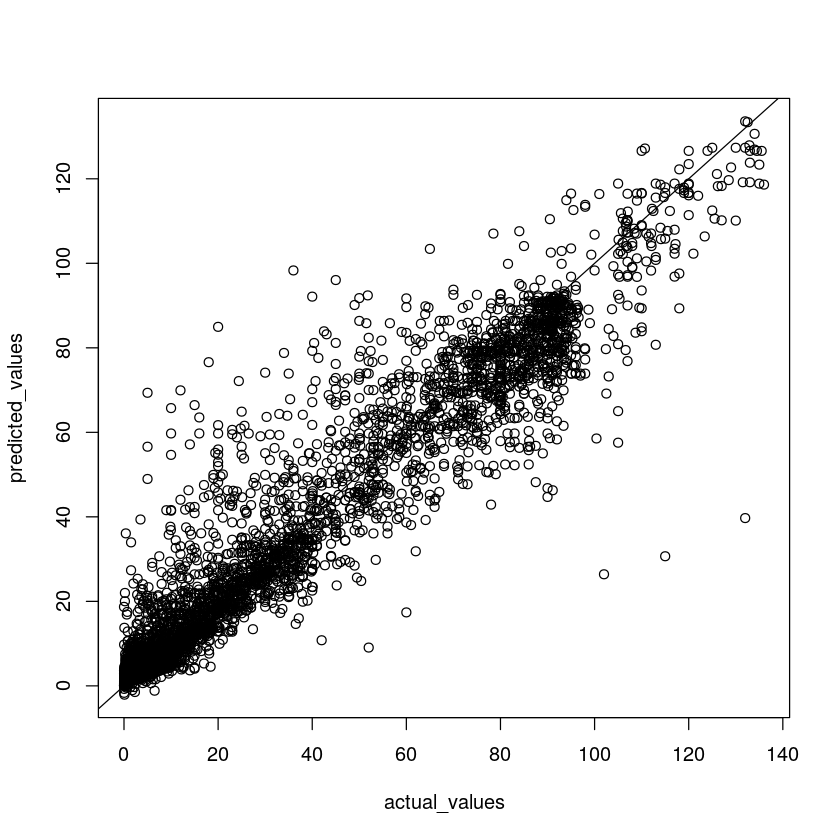

In [74]:
plot(test$critical_temp,preds.xgb, col="black", xlab="actual_values",ylab="predicted_values")
abline(a=0,b=1)


In the above graph, the X-axis represents actual values for critical temperature while Y-axis represents the predicted values of the critical temperature. It is observed that the predited values and observed values do follow the linear regression line which indicates that XGBoost model fits the data extremely well by covering 91.4 % of the variations in the data.


In [75]:
print(paste0("XGBoost model MSE:",mean((test$critical_temp - preds.xgb)^ 2)))
print(paste0("XGBoost model RMSE:", RMSE(preds.xgb, test$critical_temp)))
print(paste0("XGBoost model R^2:", R2(preds.xgb, test$critical_temp, form = "traditional")))

[1] "XGBoost model MSE:101.430409367693"
[1] "XGBoost model RMSE:10.071266522523"
[1] "XGBoost model R^2:0.914012390610035"


## 5. Model Comparsion

#### Comparsion between Linear model and Lasso Model

* By comparing the linear and lasso model, we can observe that there is not much difference observed in R^2 and RMSE value.

* The Linear model explains 65.16% of the data variation while the Lasso model explains 64.28%

* The RMSE of Linear model was observed to be 20.25 while the RMSE of the Lasso model was 20.52

* On comparsion it is evident that the Linear model performs much better than the Lasso model with less RMSE and increased R^2.

#### Comparsion between Linear, Lasso and XGBoost Model

* We compare all the three models based on R^2, MSE and RMSE values.

* XGBoost model outperforms with respect to all the models with R^2 value 0.91 which indicates that it covers 91% of the variations in the test data.

* The MSE and RMSE is observed to be decreased drastically to 101.43 and 10.07 respectively as compared to the other two models.

* Thus, we can choose XGBoost model to predict the critical temperature of the superconducting materials, given the chemial properties of the material.



## 6. Conclusion

* Here, we explored the superconductor data, determined which features contribute to predict the critical temperature and also built statistical models to predict the critical temperature of the superconducting material.

* We first explored the 4 main properties of superconductor such as Atomic Mass, Atomic Radius, Density and Fusion Heat which were chosen intuitively.

* With the help of box-plots we determined the predictors that can be candidates for elimination due to low variance.

* With the help of correlation plots we determined the predictors that can be candidates for elimination due to multicollinearity.

* We validated the chosen predictors for elimination during EDA with the help of R functions.

* After eliminating the predictors on the basis of low variance and high correlation we were left with 44 variables.

* We used backward stepwise selection method to further reduce the dimension of the data.

* This method gave us 27 variables which were highly contributing towards the prediction of the critical temperature.

* The major properties contributing towards predicting critical temperature of the superconducting material are:
        - Thermal Conductivity
        - Atomic radius
        - Electron affinity
        - Atomic Mass
        - Density
        - Valence
        
* We built 3 statistical models on these features and discovered that XGBoost model gives the highest accuracy with low root mean squared error as compared to others.



## 7. References

1. Matter, A., & Matter, A. (2019). Superconductivity and entropy. Retrieved 16 September 2019, from https://www.physicsforums.com/threads/superconductivity-and-entropy.700856/
2. (2019). Retrieved 16 September 2019, from https://arxiv.org/pdf/1803.10260.pdf
3. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learn-
ing (Vol. 112, p. 18). New York: springer.